# SARIMAX

## 1. Análisis previo de cointegración y quiebre estructural

A través de este análisis se confirma que es correcto utilizar el PIB como variable explícativa del ISR y del IVA, pero no del resto de las variables. 

También es necesario verificar la existencia de raíz unitaria, porque de lo contrario, se podría caer en regresiones espurias (relaciones aparentemente correctas entre variables que no tienen relación alguna). 

Para hacer este análisis, se aplicó la prueba de contraste aumentado de Dickey Fuller (ADF-GLS), con lo que se concluye que todas las series, con excepción del IEPS federal a las gasolinas y diésel tienen raíz unitaria, pero esta se elimina al tomar las series en primera diferencia (* denota un valor p menor al 0.10, ** denota un valor p menor al 0.05 y *** denota un valor p menor al 0.01):

| Serie               | Series en niveles   |               | Series en 1a diferencia  |              |
|---------------------|---------------------|---------------|--------------------------|--------------|
|                     | Estadístico ADF-GLS | Decisión      | Estadístico ADF-GLS      | Decisión     |
| PIB Real            | 0.551355            | Raíz Unitaria | -3.94495***              | Estacionaria |
| ISR                 | -0.848330           | Raíz Unitaria | -5.452966***             | Estacionaria |
| IVA                 | -1.109062           | Raíz Unitaria | -7.694337***             | Estacionaria |
| IEPS Gasolinas      | -2.891800*          | Estacionaria  |                          |              |
| IEPS Tabacos        |  -0.809903          | Raíz Unitaria | -6.605603***             | Estacionaria |
| IEPS Bebidas Alcohólicas  | -0.640294     | Raíz Unitaria | -6.181862***             | Estacionaria |
| IEPS Cervezas       | -0.236237           | Raíz Unitaria | -6.233054***             | Estacionaria |
| IEPS Bebidas Saborizadas  | -0.195569     | Raíz Unitaria | -6.610010***             | Estacionaria |
| IEPS Alimentos      | -4.737662***        | Estacionaria  |                          |              |
| Impuesto a la Importación | -0.214093     | Raíz Unitaria | -5.421195***             | Estacionaria |
| Ingresos Petroleros | -2.313334           | Raíz Unitaria | -6.450070***             | Estacionaria | 

### 1.1 Cointegración de las Series

Una vez que se tienen los resultados de la prueba ADF-GLS, se puede verificar si las series estacionarias en efecto están relacionadas y es correcto utilizar a una para explicar a la otra. Para ello, utilizaré la prueba de cointegración de Engle-Granger. En esta prueba se verifica primero que las dos series a utilizar tengan raíz unitaria (paso que ya se realizó), luego se verifica si al hacer la regresión por Mínimos Cuadrados Ordinarios (MCO) entre ellas, su residual es estacionario. Los resultados se muestran a continuación:

| Variable Dependiente     | Variable Explicativa| ADF de res. MCO | Decisión |
|--------------------------|---------------------|---------------|--------|
| ISR                      | PIB Real            | -3.6334**     | Estacionaria |
| IVA                      | PIB Real            | -2.77879*     | Estacionaria |
| IEPS Tabacos             | PIB Real            | -2.66036*     | Estacionaria |
| IEPS Bebidas Alcohólicas | PIB Real            | -1.63147      | Raíz Unitaria |
| IEPS Cervezas            | PIB Real            | -2.50686      | Raíz Unitaria |
| IEPS Bebidas Saborizadas | PIB Real            | -2.78059      | Raíz Unitaria |
| Impuesto a la importación| PIB Real            | -1.4614       | Raíz Unitaria |
| Ingresos Petroleros      | PIB Real            | -1.30229      | Raíz Unitaria |

Por lo tanto, y dado que los residuales del MCO en el caso del ISR y del IVA con el PIB son estacionarios, es correcto utilizar el PIB como variable para explicar el ISR y el IVA; dado que se tiene el caso contrario para el resto de los impuestos y de los ingresos petroleros (estacionarios), no se utilizó el PIB como variable explicativa para las otras variables.

### 3.2 Quiebres Estructurales

Por otro lado, es necesario identificar si las series que se analizan presentan cambios estructurales que pueden deberse a mofificaciones legislativas u otro hechos que sean económicamente relevantes. Para revisar esto, se hace primero una regresión entre las variables que se van a analizar, en este caso, ISR e IVA, y la variable explicativa PIB. Luego se aplican las pruebas CUSUM y CUSUMQ para identificar posibles quiebres. Luego se verifican con la prueba de Chow

| Variable  | Quiebres CUSUM  | Quiebres CUSUMQ    | Valor p, prueba de Chow |
|---------- |-----------      |---------------|--------|
| ISR       | 2008-T1  | 2012-T1, 2014-T1, 2017-T2     | 2008-T1***,  2012-T1***, 2014-T1***, 2017-T2*** |
| IVA       | 2018-T1         | 2010-T1     | 2018-T1, 2010-T1*** |

Como resultado de las pruebas, la prueba de Chow indica que todos los quiebres son significativos, mientras que en el caso del IVA, solo es significativo el quiebre del primer trimestre de 2010. Con estos resultados hay que identificar los cambios institucionales para identificar cuáles cambios coinciden con eventos económicos. 

En el caso del IVA, el quiebre significativo coincide con el incremento general de la tasa del IVA del 15% al 16%. Por lo anterior, considero adecuado agregar una variable dummy (dicotomica con ceros y unos), que indique la tasa del impuesto antes de 2010 (15%, indicado con un cero) y después (16%, indicado con un uno). De hecho, antes de 2002, la tasa estuvo cambiando entre 10% y 15%, pero mi muestra no llega hasta esas fechas.  

Para el caso del ISR, y en cuanto a los quiebres identificados, únicamente identifico la reforma del ISR que entró en vigor a partir de 2014. Como resultado de dicha reforma, se tuvo una Ley del Impuesto Sobre la Renta completamente nueva, por lo que considero adecuado a utilizar una variable dummy que indica el período en el cual entro en vígor la última reforma del ISR (1 a partir de 2014).

Para el caso de las otras variables no se realiza la prueba CUSUM pues no se tiene variable explícativa. Sin embargo, sí hice un ajuste en el IEPS federal a gasolinas y diésel intencionalmente para dejar fuera la parte de la serie anterior a 2015. Esto lo hago porque justo en ese año hubo una reforma importante en este impuesto para cobrarlo a cuotas por litro, mientras que antes de dicha reforma, el IEPS se utilizaba para controlar el precio de las gasolinas, e incluso podía llegar a ser negativo (subsidio al precio final).
 
## 2. SARIMAX de las series mensuales

Con el análisis que he presentado hasta el momento, puedo comenzar a utilizar el módelos SARIMAX:
- S, de *seasonal*, porque considera series que pueden tener estacionalidad.
- AR, de autoregresivo, por series que dependen de observaciones previas.
- I, de integradas, porque los módelos pueden considerar series que se integran, o dependen de si mismas de manera estacional (por ejemplo, anual).
- MA, de *moving average* o media móvil porque considera series que pueden ser medias móviles.
- X, po el vector de variables regresivas que puede incluir.

En general, la metodología que sigue este modelo, es la [metodología Box-Jenkins](https://es.wikipedia.org/wiki/Metodología_de_Box-Jenkins): 1) identificart y seleccionar el modelo con variables son estacionarias; 2) estimar de parámetros que mejor ajusten el modelo ARIMA seleccionado; 3) comprobar el modelo obtenido mediante distintas pruebas y 4) en caso de una incorrecta especificación regresar al paso 1).

Sin embargo, en la sección anterior, concluí que el PIB no es una variable explícativa para mis series de IEPS, impuesto a la importación e ingresos petroleros. Por tanto, analizaré estas series desde su perspectiva mensual. Solo mostraré el análisis completo para la primera serie, y en el resto, dejaré solo las gráficas con los pronósticos.

### 4.1 IEPS Cervezas

La serie de IEPS a la venta de cervezas, y su descomposición en sus componentes de tendencia, estacional y residuales, se ve como sigue:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
#from fbprophet import Prophet
#from fbprophet.plot import plot_plotly
#import plotly.offline as py
#import io
import pmdarima as pm

In [2]:
df = pd.read_csv('202203mensuales.csv', sep=',', parse_dates=['fecha'], index_col='fecha', encoding = 'utf-8')
df['fecha']=df.index
df.tail()

ano  mes  dia  fechas  ieps_gas  ieps_tabacos  ieps_bebidas  \
fecha                                                                      
2022-08-01  2022    8    1  ago-22       NaN           NaN           NaN   
2022-09-01  2022    9    1  sep-22       NaN           NaN           NaN   
2022-10-01  2022   10    1  oct-22       NaN           NaN           NaN   
2022-11-01  2022   11    1  nov-22       NaN           NaN           NaN   
2022-12-01  2022   12    1  dic-22       NaN           NaN           NaN   

            ieps_cervezas  ieps_bebidassab  ieps_alimentos  importacion  \
fecha                                                                     
2022-08-01            NaN              NaN             NaN          NaN   
2022-09-01            NaN              NaN             NaN          NaN   
2022-10-01            NaN              NaN             NaN          NaN   
2022-11-01            NaN              NaN             NaN          NaN   
2022-12-01            NaN              NaN             NaN          NaN   

            rfp_petroleros      fecha  
fecha                                  
2022-08-01             NaN 2022-08-01  
2022-09-01             NaN 2022-09-01  
2022-10-01             NaN 2022-10-01  
2022-11-01             NaN 2022-11-01  
2022-12-01             NaN 2022-12-01

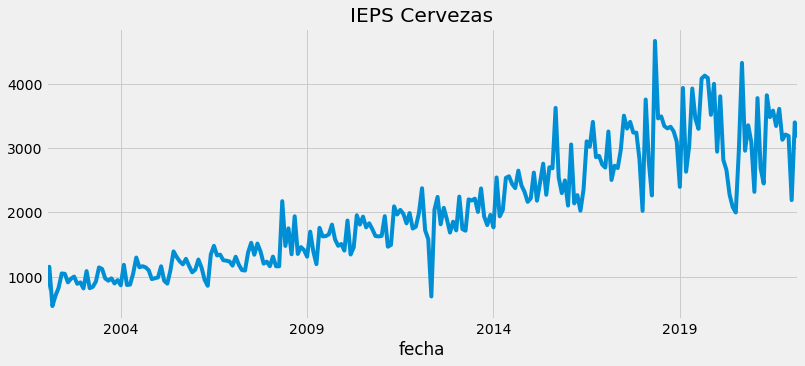

In [3]:
ieps_cervezasp=df['ieps_cervezas']
ieps_cervezas=ieps_cervezasp.dropna()
ieps_cervezas.plot(figsize=(12,5))
plt.title('IEPS Cervezas')
plt.show()

El histograma y la correspondiente función de densidad se ven como sigue:

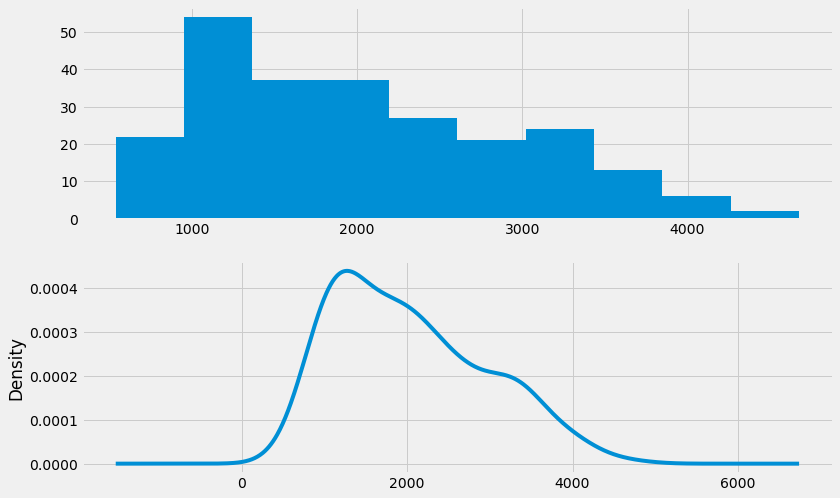

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,8))
ieps_cervezas.hist(ax=ax1)
ieps_cervezas.plot(kind='kde',ax=ax2)
plt.show()

La descomposición de esta serie en sus componentes de tendencia, estacional y residuales, se ve como sigue:

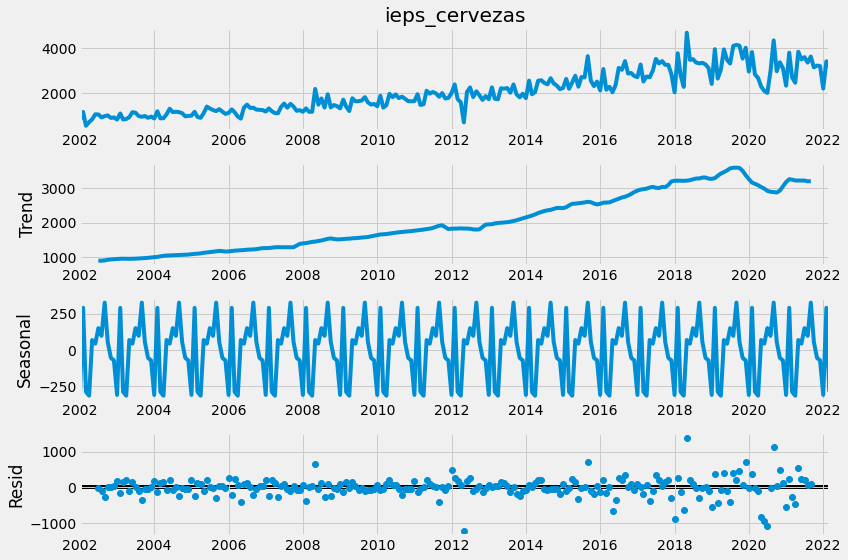

In [7]:
decomposition = seasonal_decompose(ieps_cervezas, model='additive')
plt.rcParams['figure.figsize'] = 12, 8
decomposition.plot()
plt.show()

Los correlogramas, se ven como sigue:

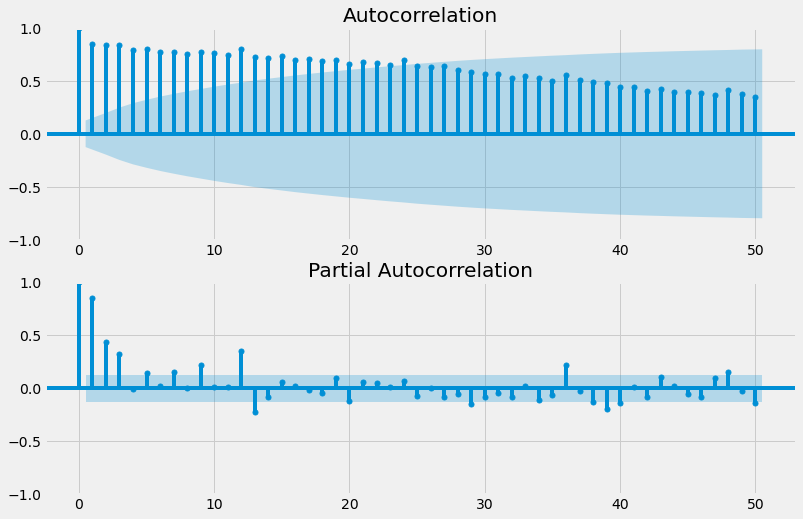

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,8), sharex=False, sharey=False)
ax1 = plot_acf(ieps_cervezas, lags=50, ax=ax1)
ax2 = plot_pacf(ieps_cervezas, lags=50, ax=ax2)
plt.show()

Aquí se aplica la prueba Dickey-Fuller que falla en rechazar que la serie tenga raíz unitaria. Con ello se concluye que la serie tiene raíz unitaria.

In [9]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ieps_cervezas)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -0.542167
p-value                          0.883522
#Lags Used                      12.000000
Number of Observations Used    230.000000
Critical Value (1%)             -3.459106
Critical Value (5%)             -2.874190
Critical Value (10%)            -2.573512
dtype: float64


Se genera la serie en primeras diferencias:

In [10]:
df_diff = ieps_cervezas.diff().diff(12)
df_diff.dropna(inplace=True)
df_diff.tail()

fecha
2021-11-01   -315.212501
2021-12-01    240.578586
2022-01-01   -224.423903
2022-02-01   -249.940468
2022-03-01    861.233911
Name: ieps_cervezas, dtype: float64

Y para la serie en primeras diferencias, se rechaza la hipotesis de que la serie tiene raíz unitaria, en favor de la hipotesis que la serie es estacionaria. En otras palabras, se puede concluir que la serie en primeras diferencias sí es estacionaria.

In [11]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_diff)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.270287e+00
p-value                        1.595015e-10
#Lags Used                     1.500000e+01
Number of Observations Used    2.140000e+02
Critical Value (1%)           -3.461282e+00
Critical Value (5%)           -2.875143e+00
Critical Value (10%)          -2.574020e+00
dtype: float64


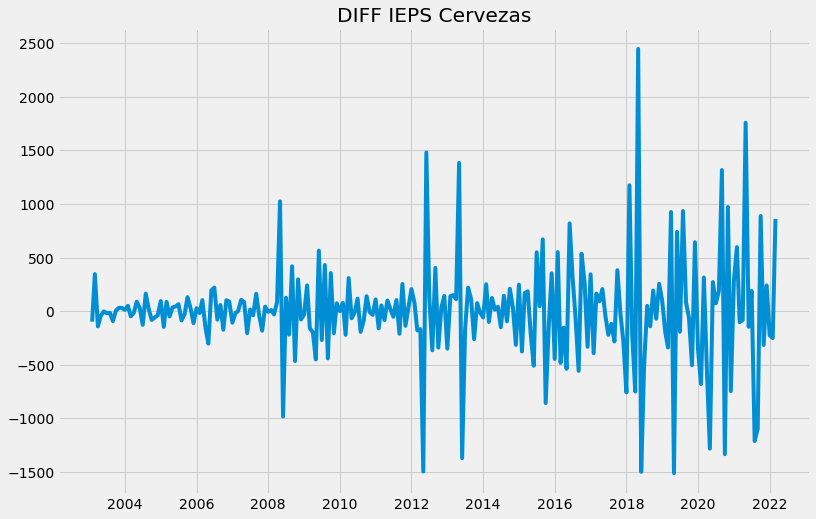

In [12]:
plt.plot(df_diff)
plt.title('DIFF IEPS Cervezas')
#plt.savefig('diffplot')
plt.show()

Aquí los correlogramas de la serie en primeras diferencias:

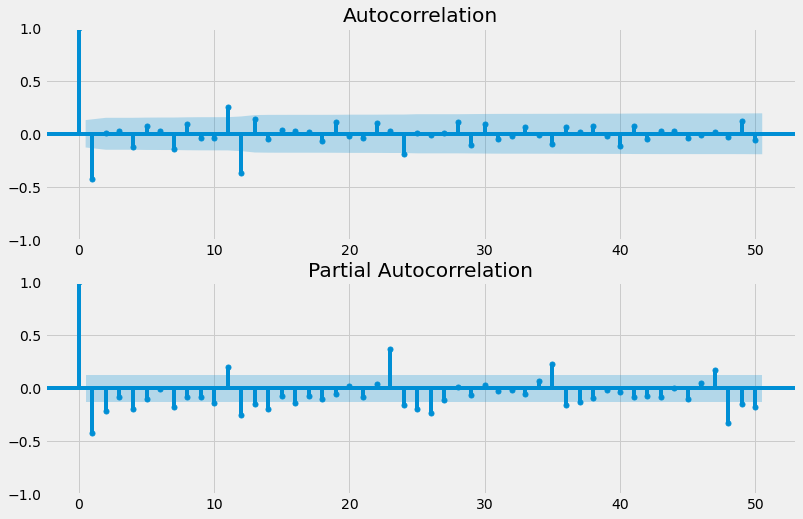

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,8), sharex=False, sharey=False)
ax1 = plot_acf(df_diff, lags=50, ax=ax1)
ax2 = plot_pacf(df_diff, lags=50, ax=ax2)
#plt.savefig('acfpacf2')
plt.show()

Con este comando, automáticamente se evaluan diferentes propuestas de modelos ARIMA, seleccionando el mejor modelo:

In [14]:
model = pm.auto_arima(ieps_cervezas, d=1, D=1,
                      seasonal=True, m=12, trend='c', 
                      start_p=0, start_q=0, max_order=9, test='adf', stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=3409.601, Time=0.82 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3493.779, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3421.164, Time=0.42 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3332.632, Time=0.65 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3429.243, Time=0.15 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3334.618, Time=1.05 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3334.602, Time=1.70 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3395.233, Time=0.70 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=3.69 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3407.895, Time=0.45 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3326.982, Time=0.94 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=3328.844, Time=1.40 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=3328.727, Time=2.43 sec
 ARIMA(1,1,1)(1,1,0)[12]     

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  243
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1658.491
Date:                            Thu, 24 Mar 2022   AIC                           3326.982
Time:                                    22:18:44   BIC                           3344.172
Sample:                                         0   HQIC                          3333.916
                                            - 243                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0785      0.681     -0.115      0.908      -1.412       1.255
ar.L1          0.2405      0.049      4.882      0.000       0.144       0.337
ma.L1         -0.8996      0.025    -36.366      0.000      -0.948      -0.851
ma.S.L12      -0.7704      0.040    -19.417      0.000      -0.848      -0.693
sigma2      1.025e+05   4951.766     20.700      0.000    9.28e+04    1.12e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               787.12
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               8.87   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Se entrena dicha especificación para obtener los mejores coeficientes:

In [16]:
model = SARIMAX(ieps_cervezas,order=(1,1,1),seasonal_order=(0,1,1,12))
results = model.fit()
results.summary()

C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      ieps_cervezas   No. Observations:                  243
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1658.498
Date:                            Thu, 24 Mar 2022   AIC                           3324.997
Time:                                    22:18:50   BIC                           3338.749
Sample:                                01-01-2002   HQIC                          3330.544
                                     - 03-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2407      0.045      5.361      0.000       0.153       0.329
ma.L1         -0.8996      0.025    -36.583      0.000      -0.948      -0.851
ma.S.L12      -0.7706      0.038    -20.293      0.000      -0.845      -0.696
sigma2      1.025e+05   4858.330     21.099      0.000     9.3e+04    1.12e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               786.40
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               8.89   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Y los resultados se ven bastante prometedores en esta parte de prueba:

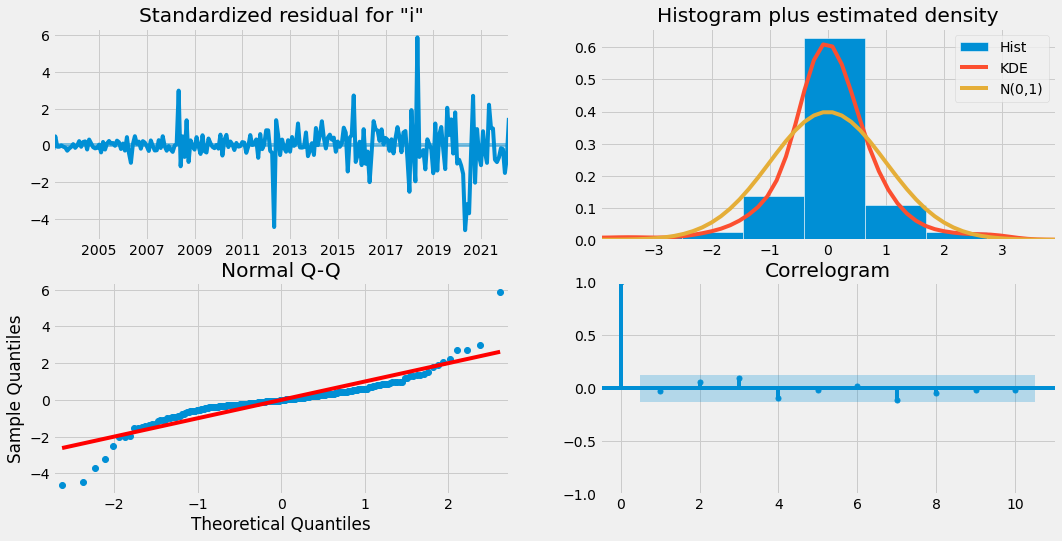

In [17]:
results.plot_diagnostics(figsize=(16, 8))
#plt.savefig('modeldiagnostics1')
plt.show()

Calculo y gráfico los pronósticos para toda la serie

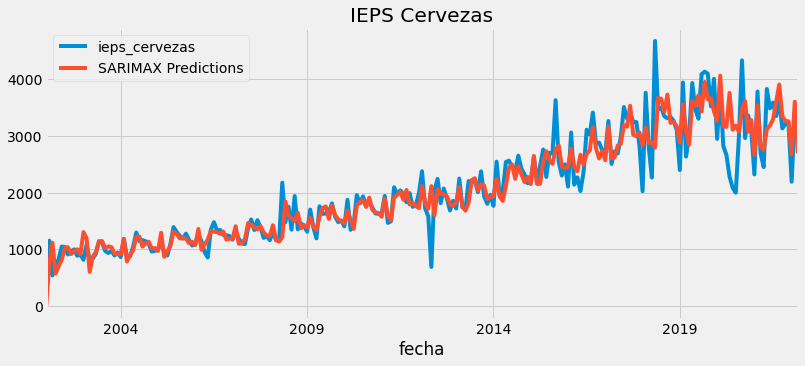

In [18]:
predictions = results.predict(start=0, end=len(ieps_cervezas)-1, dynamic=False, typ='levels').rename('SARIMAX Predictions')
title = 'IEPS Cervezas'
ax = ieps_cervezas.plot(legend=True,figsize=(12,5),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

Calculo los estadísticos del modelo:

In [19]:
r2_score(ieps_cervezas, predictions)
evaluation_results = pd.DataFrame({'r2_score': r2_score(ieps_cervezas, predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(ieps_cervezas, predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(ieps_cervezas, predictions)
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - ieps_cervezas)/np.abs(ieps_cervezas))*100 
evaluation_results

r2_score  mean_absolute_error  mean_squared_error  \
0  0.874697           199.113734       103093.803367   

   mean_absolute_percentage_error  
0                       10.543012

Y hago los pronósticos hacia adelante. Esta es la parte que más me interesa para cada serie.

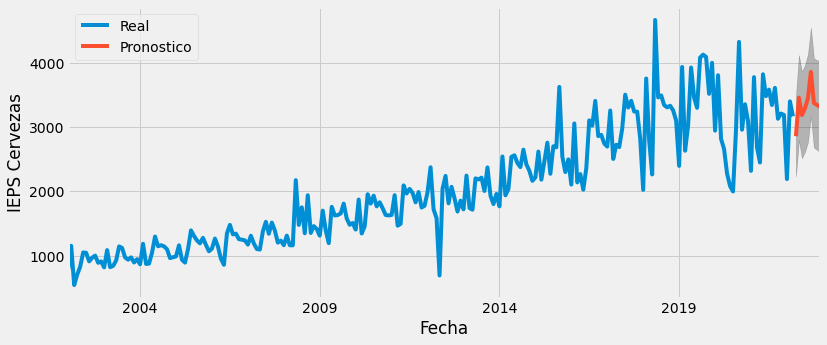

In [20]:
pred_f = results.get_forecast(steps=9)
pred_ci = pred_f.conf_int()
ax = ieps_cervezas.plot(label='Real', figsize=(12, 5))
pred_f.predicted_mean.plot(ax=ax, label='Pronostico')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('IEPS Cervezas')
plt.legend()
plt.show()

Y guardo los resultados en un csv para su posterior uso.

In [21]:
x=pred_f.predicted_mean
x.to_csv('arima_iepscervezas.csv')

### 4.2 IEPS Bebidas

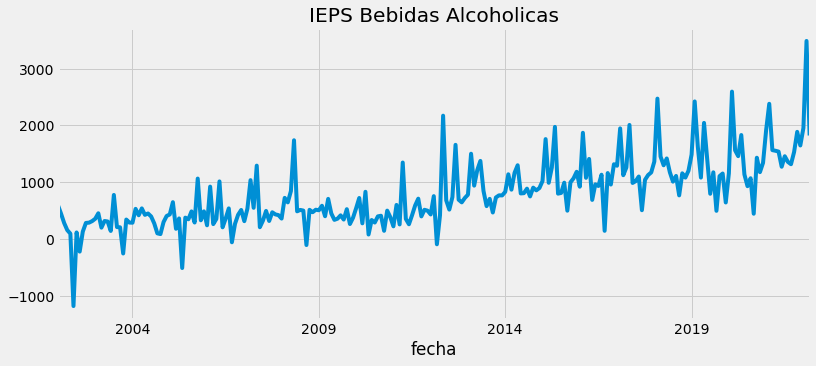

In [22]:
ieps_bebidasp=df['ieps_bebidas']
ieps_bebidas=ieps_bebidasp.dropna()
ieps_bebidas.plot(figsize=(12,5))
plt.title('IEPS Bebidas Alcoholicas')
plt.show()

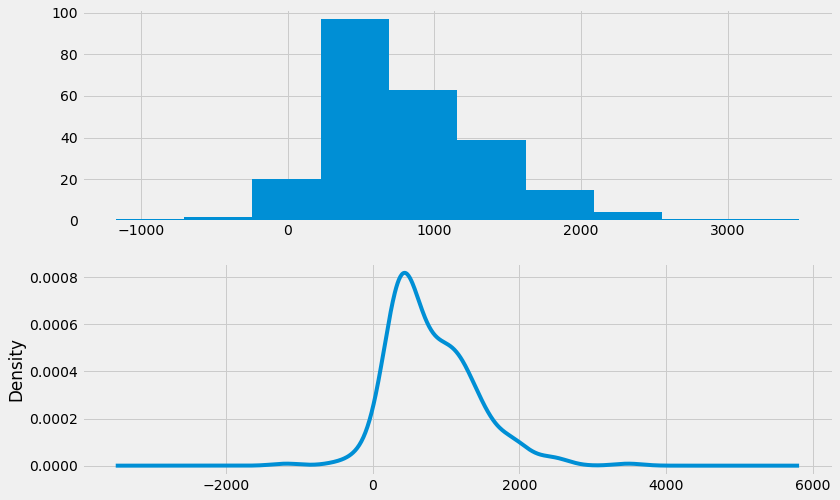

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,8))
ieps_bebidas.hist(ax=ax1)
ieps_bebidas.plot(kind='kde',ax=ax2)
plt.show()

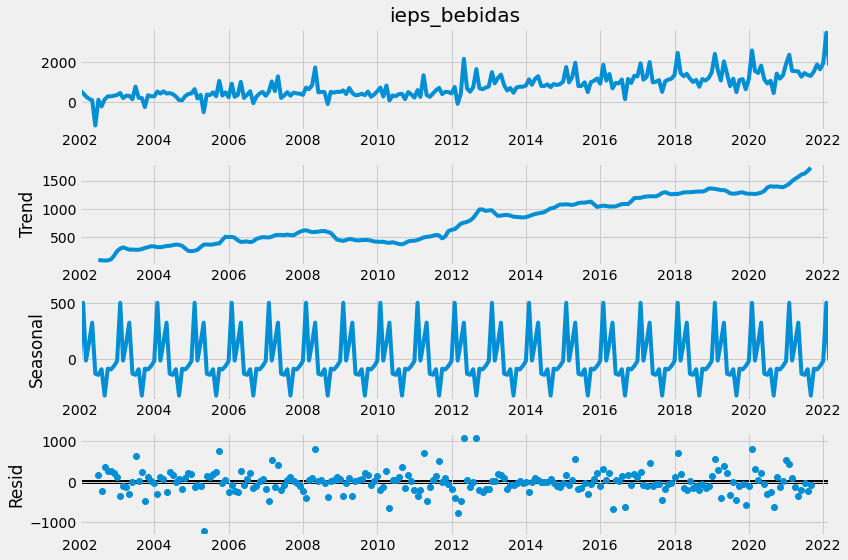

In [25]:
decomposition = seasonal_decompose(ieps_bebidas, model='additive')
plt.rcParams['figure.figsize'] = 12, 8
decomposition.plot()
plt.show();

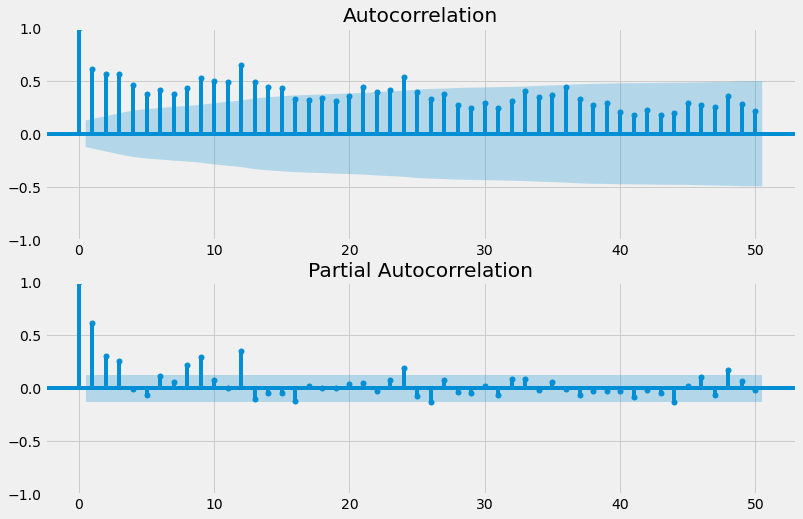

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,8), sharex=False, sharey=False)
ax1 = plot_acf(ieps_bebidas, lags=50, ax=ax1)
ax2 = plot_pacf(ieps_bebidas, lags=50, ax=ax2)
plt.show()

In [27]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ieps_bebidas)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.278587
p-value                          0.976340
#Lags Used                      11.000000
Number of Observations Used    231.000000
Critical Value (1%)             -3.458980
Critical Value (5%)             -2.874135
Critical Value (10%)            -2.573482
dtype: float64


In [28]:
df_diff = ieps_bebidas.diff().diff(12)
df_diff.dropna(inplace=True)
df_diff.tail()

fecha
2021-11-01     606.608770
2021-12-01    -403.390887
2022-01-01    -268.656667
2022-02-01    1068.442420
2022-03-01    -847.267125
Name: ieps_bebidas, dtype: float64

In [29]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_diff)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.261071e+00
p-value                        4.222045e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.170000e+02
Critical Value (1%)           -3.460849e+00
Critical Value (5%)           -2.874953e+00
Critical Value (10%)          -2.573919e+00
dtype: float64


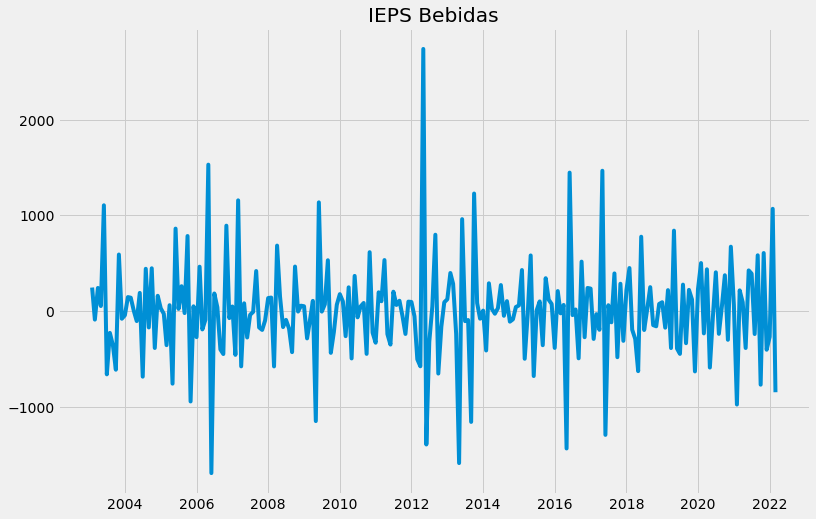

In [30]:
plt.plot(df_diff)
plt.title('IEPS Bebidas')
#plt.savefig('diffplot')
plt.show()

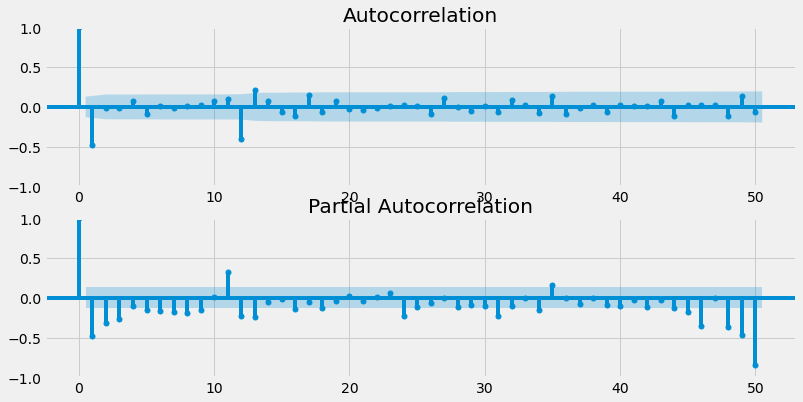

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6), sharex=False, sharey=False)
ax1 = plot_acf(df_diff, lags=50, ax=ax1)
ax2 = plot_pacf(df_diff, lags=50, ax=ax2)
#plt.savefig('acfpacf2')
plt.show()

In [32]:
model = pm.auto_arima(ieps_bebidas, d=1, D=1,
                      seasonal=True, m=12, trend='c', 
                      start_p=0, start_q=0, max_order=9, test='adf', stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=3455.420, Time=0.88 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3532.337, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3420.731, Time=0.39 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3332.576, Time=0.70 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3334.059, Time=1.13 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=1.93 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3362.836, Time=0.62 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=5.77 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3455.193, Time=0.43 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3334.068, Time=1.07 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=3334.141, Time=1.00 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=3390.797, Time=0.70 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=1.03 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : 

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  243
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1662.288
Date:                            Thu, 24 Mar 2022   AIC                           3332.576
Time:                                    22:20:28   BIC                           3346.328
Sample:                                         0   HQIC                          3338.124
                                            - 243                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4420      0.859      0.514      0.607      -1.242       2.126
ma.L1         -0.9019      0.036    -25.096      0.000      -0.972      -0.831
ma.S.L12      -0.7090      0.043    -16.577      0.000      -0.793      -0.625
sigma2      1.075e+05   6700.618     16.050      0.000    9.44e+04    1.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):               173.21
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.84
Prob(H) (two-sided):                  0.31   Kurtosis:                         6.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
model = SARIMAX(ieps_bebidas,order=(0,1,1),seasonal_order=(0,1,1,12))
results = model.fit()
results.summary()

C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       ieps_bebidas   No. Observations:                  243
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1662.457
Date:                            Thu, 24 Mar 2022   AIC                           3330.914
Time:                                    22:27:14   BIC                           3341.228
Sample:                                01-01-2002   HQIC                          3335.075
                                     - 03-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9001      0.036    -25.080      0.000      -0.970      -0.830
ma.S.L12      -0.7068      0.041    -17.243      0.000      -0.787      -0.626
sigma2      1.077e+05   6128.131     17.582      0.000    9.57e+04     1.2e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):               172.77
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             0.83
Prob(H) (two-sided):                  0.33   Kurtosis:                         6.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

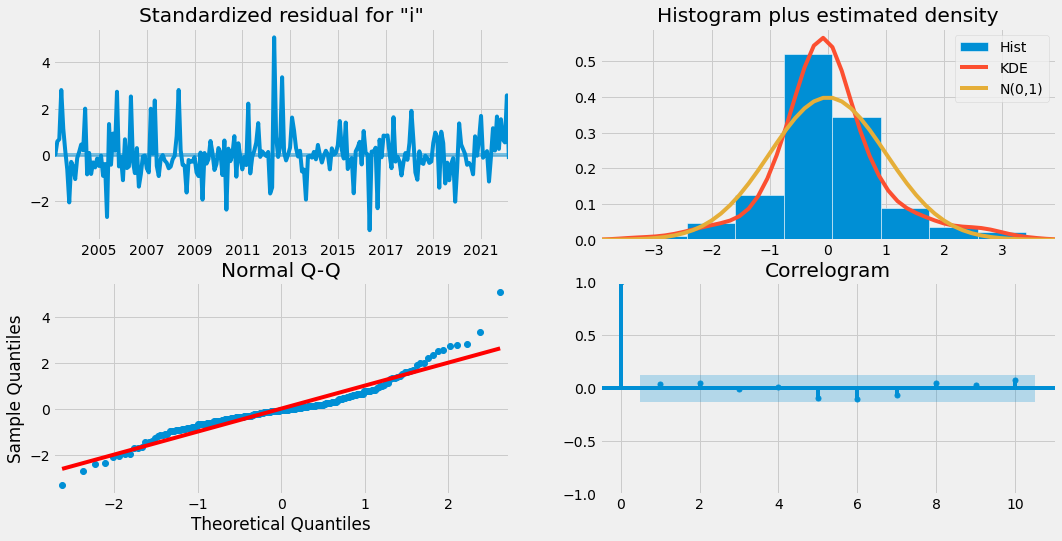

In [35]:
results.plot_diagnostics(figsize=(16, 8))
#plt.savefig('modeldiagnostics2')
plt.show()

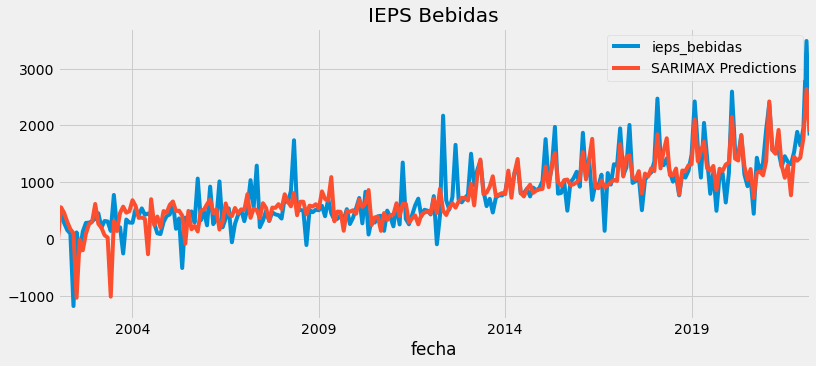

In [36]:
predictions = results.predict(start=0, end=len(ieps_bebidas)-1, dynamic=False, typ='levels').rename('SARIMAX Predictions')
title = 'IEPS Bebidas'
ax = ieps_bebidas.plot(legend=True,figsize=(12,5),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [37]:
r2_score(ieps_bebidas, predictions)
evaluation_results = pd.DataFrame({'r2_score': r2_score(ieps_bebidas, predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(ieps_bebidas, predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(ieps_bebidas, predictions)
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - ieps_bebidas)/np.abs(ieps_bebidas))*100 

evaluation_results

r2_score  mean_absolute_error  mean_squared_error  \
0  0.642227           230.647546       121310.740442   

   mean_absolute_percentage_error  
0                       57.414834

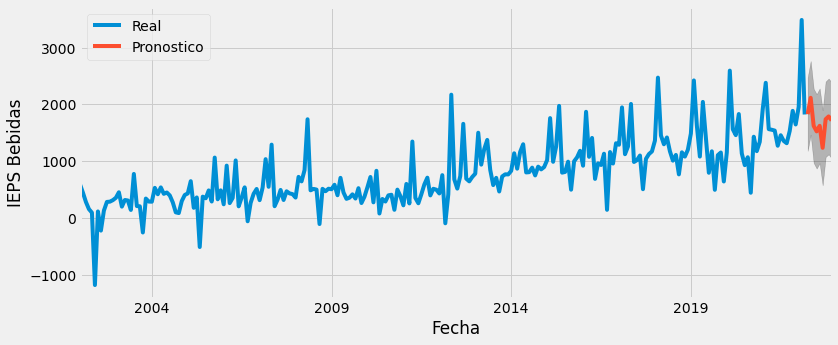

In [38]:
pred_f = results.get_forecast(steps=9)
pred_ci = pred_f.conf_int()
ax = ieps_bebidas.plot(label='Real', figsize=(12, 5))
pred_f.predicted_mean.plot(ax=ax, label='Pronostico')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('IEPS Bebidas')
plt.legend()
plt.show()

In [39]:
x=pred_f.predicted_mean
x.to_csv('arima_iepsbebidas.csv')

### 4.3 IEPS Tabacos

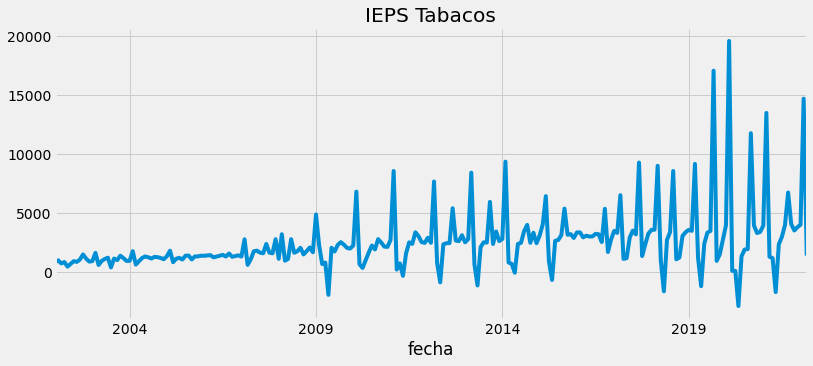

In [40]:
ieps_tabacosp=df['ieps_tabacos']
ieps_tabacos=ieps_tabacosp.dropna()
ieps_tabacos.plot(figsize=(12,5))
plt.title('IEPS Tabacos')
plt.show()

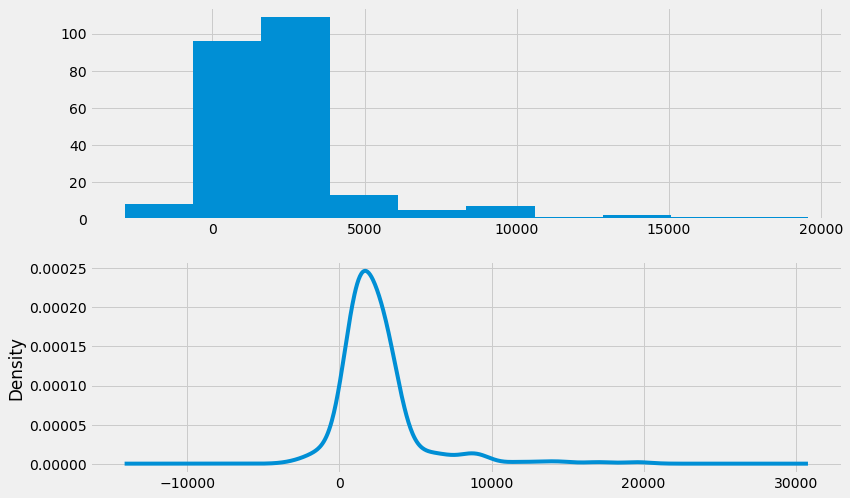

In [41]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,8))
ieps_tabacos.hist(ax=ax1)
ieps_tabacos.plot(kind='kde',ax=ax2)
plt.show()

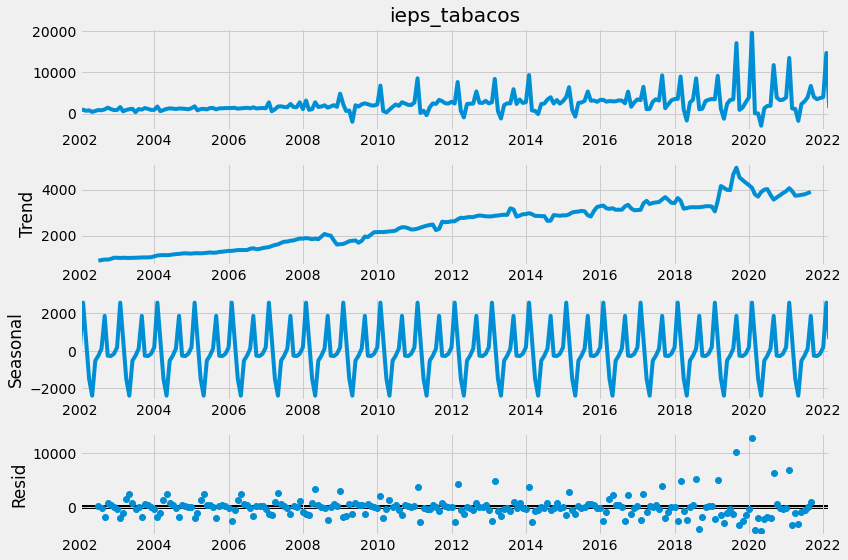

In [43]:
decomposition = seasonal_decompose(ieps_tabacos, model='additive')
plt.rcParams['figure.figsize'] = 12, 8
decomposition.plot()
plt.show();

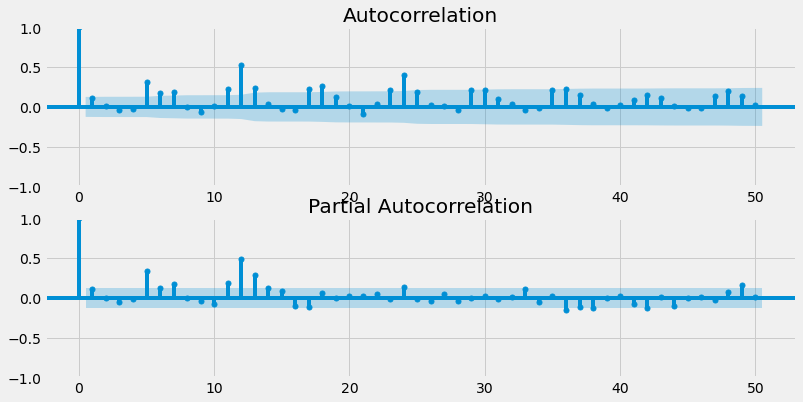

In [44]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6), sharex=False, sharey=False)
ax1 = plot_acf(ieps_tabacos, lags=50, ax=ax1)
ax2 = plot_pacf(ieps_tabacos, lags=50, ax=ax2)
plt.show()

In [45]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ieps_tabacos)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -0.840702
p-value                          0.806873
#Lags Used                      14.000000
Number of Observations Used    228.000000
Critical Value (1%)             -3.459361
Critical Value (5%)             -2.874302
Critical Value (10%)            -2.573571
dtype: float64


In [46]:
df_diff = ieps_tabacos.diff().diff(12)
df_diff.dropna(inplace=True)
df_diff.tail()

fecha
2021-11-01      95.682636
2021-12-01     186.965717
2022-01-01    -325.945986
2022-02-01    1133.043369
2022-03-01   -1116.723027
Name: ieps_tabacos, dtype: float64

In [47]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_diff)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.755439e+00
p-value                        2.879728e-09
#Lags Used                     1.500000e+01
Number of Observations Used    2.140000e+02
Critical Value (1%)           -3.461282e+00
Critical Value (5%)           -2.875143e+00
Critical Value (10%)          -2.574020e+00
dtype: float64


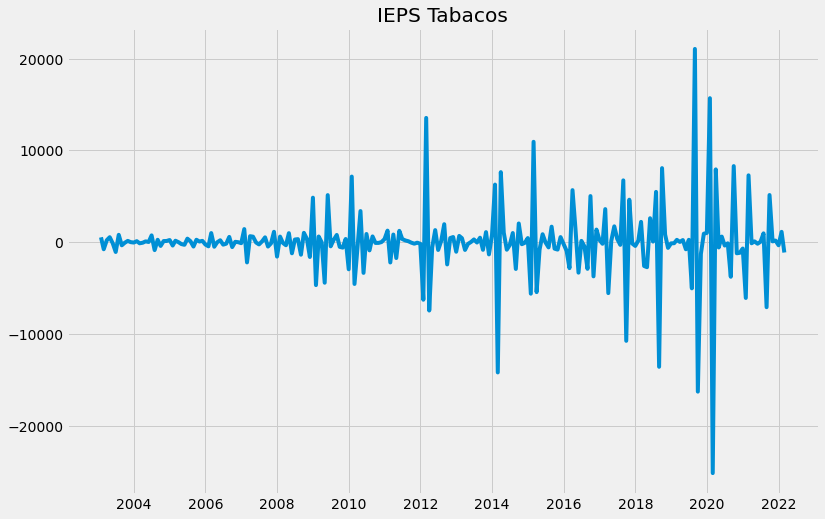

In [48]:
plt.plot(df_diff)
plt.title('IEPS Tabacos')
#plt.savefig('diffplot')
plt.show()

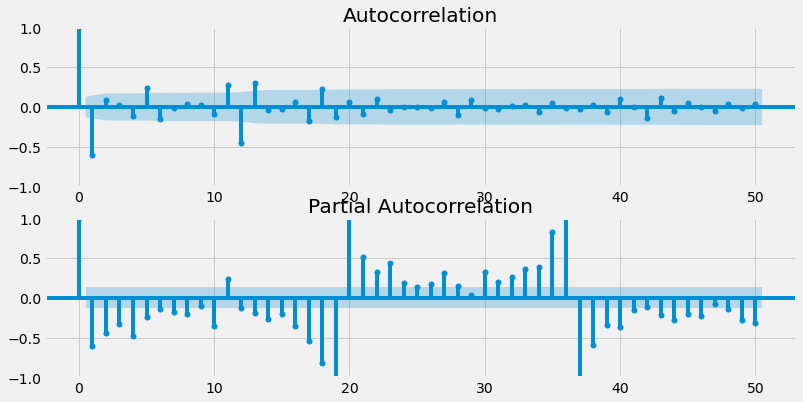

In [49]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6), sharex=False, sharey=False)
ax1 = plot_acf(df_diff, lags=50, ax=ax1)
ax2 = plot_pacf(df_diff, lags=50, ax=ax2)
#plt.savefig('acfpacf2')
plt.show()

In [50]:
model = pm.auto_arima(ieps_tabacos, d=1, D=1,
                      seasonal=True, m=12, trend='c', 
                      start_p=0, start_q=0, max_order=9, test='adf', stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=4385.984, Time=0.53 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4467.806, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4327.086, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4366.830, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4314.372, Time=0.50 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=4297.563, Time=2.80 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=4307.773, Time=0.33 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=3.02 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=4309.767, Time=1.45 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=4387.785, Time=5.65 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=4260.302, Time=6.98 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=4258.352, Time=1.41 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=4266.634, Time=0.28 sec
 ARIMA(2,1,0)(1,1,0)[12]     

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  243
Model:             SARIMAX(3, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -2071.203
Date:                                 Thu, 24 Mar 2022   AIC                           4158.406
Time:                                         22:30:44   BIC                           4185.910
Sample:                                              0   HQIC                          4169.500
                                                 - 243                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.8980      2.976     -0.302      0.763      -6.730       4.934
ar.L1         -0.4018      0.060     -6.690      0.000      -0.519      -0.284
ar.L2         -0.2765      0.105     -2.623      0.009      -0.483      -0.070
ar.L3         -0.1807      0.060     -3.024      0.002      -0.298      -0.064
ma.L1         -0.9713      0.032    -30.819      0.000      -1.033      -0.910
ma.S.L12      -0.6052      0.058    -10.439      0.000      -0.719      -0.492
ma.S.L24      -0.0441      0.058     -0.767      0.443      -0.157       0.069
sigma2      3.955e+06   1.98e+05     19.953      0.000    3.57e+06    4.34e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4276.50
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              13.69   Skew:                             3.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
model = SARIMAX(ieps_tabacos,order=(3,1,1),seasonal_order=(0,1,1,12))
results = model.fit()
results.summary()

C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       ieps_tabacos   No. Observations:                  243
Model:             SARIMAX(3, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2069.526
Date:                            Thu, 24 Mar 2022   AIC                           4151.051
Time:                                    22:32:11   BIC                           4171.680
Sample:                                01-01-2002   HQIC                          4159.372
                                     - 03-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3666      0.053     -6.958      0.000      -0.470      -0.263
ar.L2         -0.2269      0.090     -2.525      0.012      -0.403      -0.051
ar.L3         -0.1473      0.058     -2.527      0.012      -0.262      -0.033
ma.L1         -1.0000      0.034    -29.471      0.000      -1.066      -0.933
ma.S.L12      -0.6010      0.046    -13.169      0.000      -0.690      -0.512
sigma2      3.683e+06   9.21e-09      4e+14      0.000    3.68e+06    3.68e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):              4732.01
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):              14.10   Skew:                             3.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.29e+29. Standard errors may be unstable.
"""

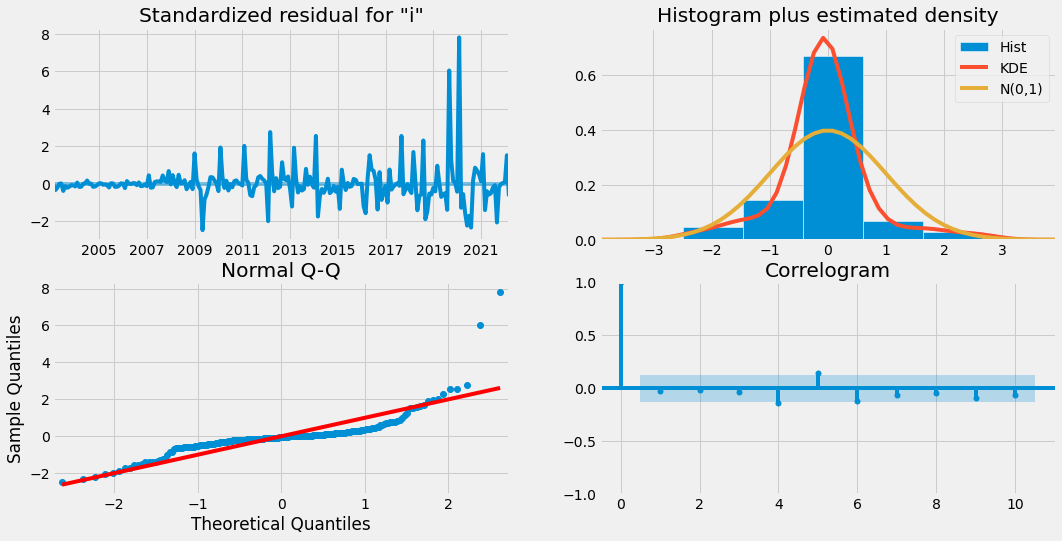

In [53]:
results.plot_diagnostics(figsize=(16, 8))
#plt.savefig('modeldiagnostics2')
plt.show()

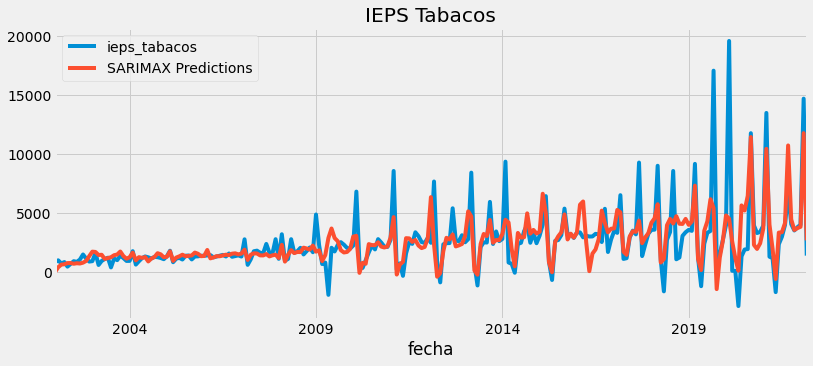

In [54]:
predictions = results.predict(start=0, end=len(ieps_tabacos)-1, dynamic=False, typ='levels').rename('SARIMAX Predictions')
title = 'IEPS Tabacos'
ax = ieps_tabacos.plot(legend=True,figsize=(12,5),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [55]:
r2_score(ieps_tabacos, predictions)
evaluation_results = pd.DataFrame({'r2_score': r2_score(ieps_tabacos, predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(ieps_tabacos, predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(ieps_tabacos, predictions)
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - ieps_tabacos)/np.abs(ieps_tabacos))*100 

evaluation_results

r2_score  mean_absolute_error  mean_squared_error  \
0  0.493255           989.894135        3.520366e+06   

   mean_absolute_percentage_error  
0                       62.075008

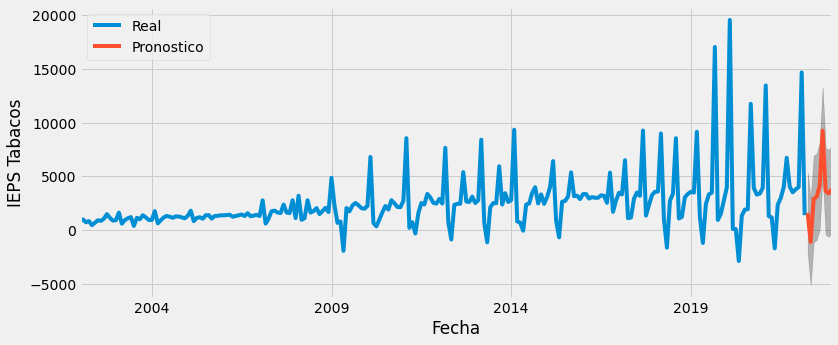

In [56]:
pred_f = results.get_forecast(steps=9)
pred_ci = pred_f.conf_int()
ax = ieps_tabacos.plot(label='Real', figsize=(12, 5))
pred_f.predicted_mean.plot(ax=ax, label='Pronostico')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('IEPS Tabacos')
plt.legend()
plt.show()

In [57]:
x=pred_f.predicted_mean
x.to_csv('arima_iepstabacos.csv')

### 4.4 IEPS Gasolinas y Diesel

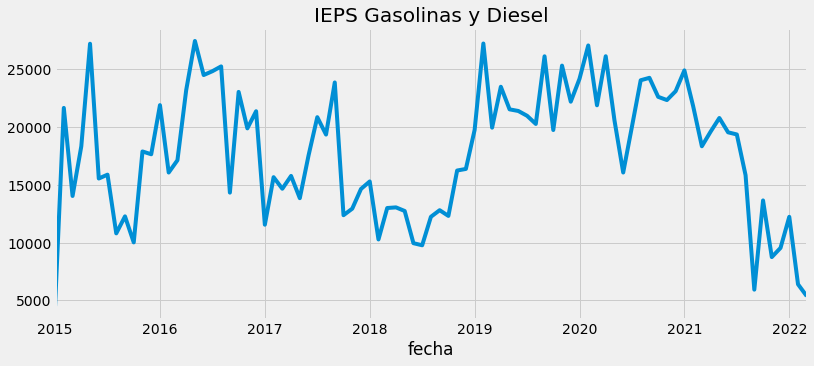

In [58]:
ieps_gasp=df['ieps_gas']
ieps_gas=ieps_gasp.dropna()
ieps_gas.plot(figsize=(12,5))
plt.title('IEPS Gasolinas y Diesel')
plt.show()

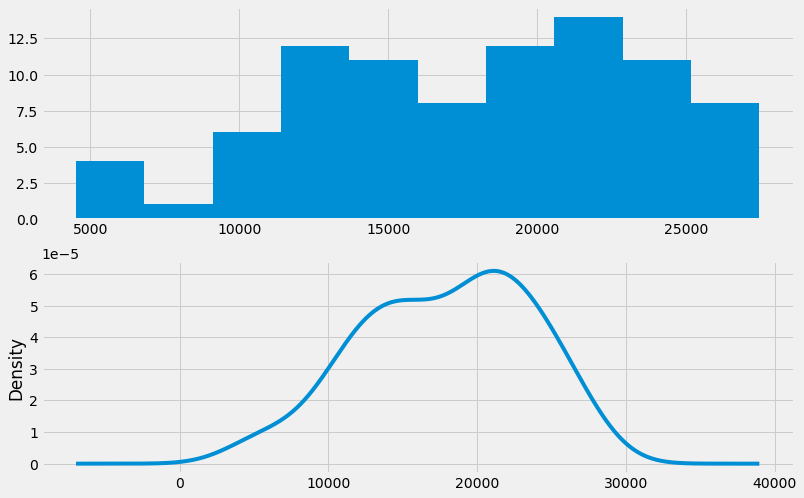

In [59]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,8))
ieps_gas.hist(ax=ax1)
ieps_gas.plot(kind='kde',ax=ax2)
plt.show()

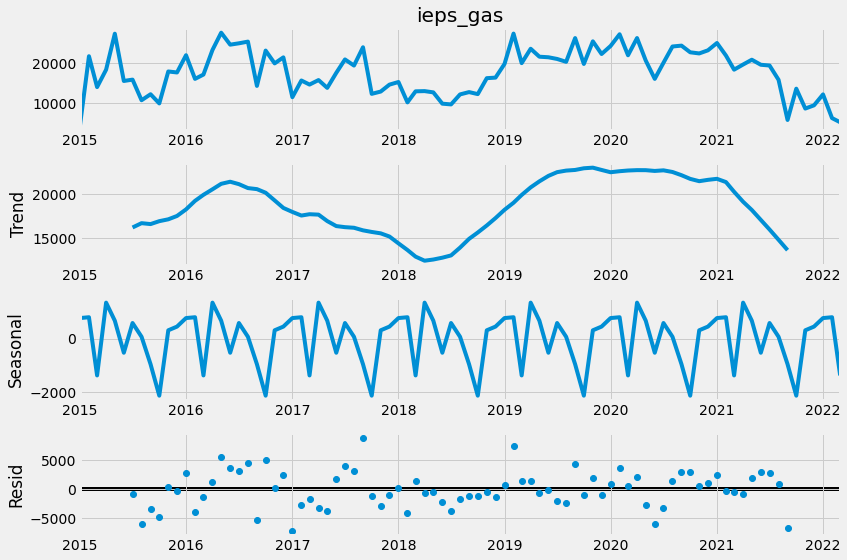

In [61]:
decomposition = seasonal_decompose(ieps_gas, model='additive')
plt.rcParams['figure.figsize'] = 12, 8
decomposition.plot()
plt.show();

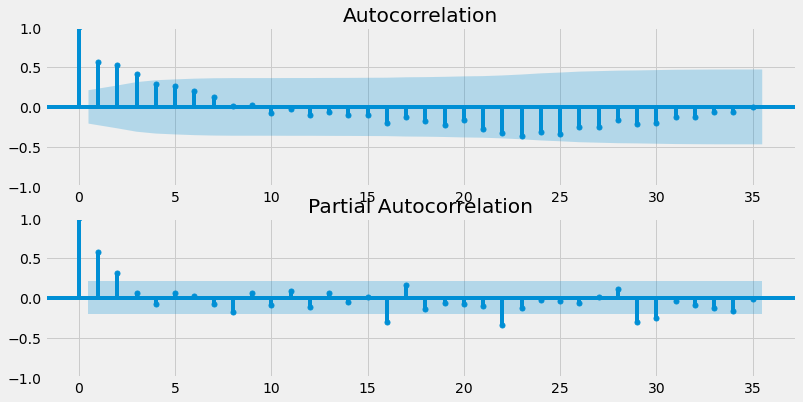

In [62]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6), sharex=False, sharey=False)
ax1 = plot_acf(ieps_gas, lags=35, ax=ax1)
ax2 = plot_pacf(ieps_gas, lags=35, ax=ax2)
plt.show()

In [63]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ieps_gas)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -2.211331
p-value                         0.202159
#Lags Used                      1.000000
Number of Observations Used    85.000000
Critical Value (1%)            -3.509736
Critical Value (5%)            -2.896195
Critical Value (10%)           -2.585258
dtype: float64


In [64]:
df_diff = ieps_gas.diff().diff(12)
df_diff.dropna(inplace=True)
df_diff.tail()

fecha
2021-11-01   -4625.070503
2021-12-01      27.818183
2022-01-01     888.492910
2022-02-01   -2749.062119
2022-03-01    2451.810646
Name: ieps_gas, dtype: float64

In [65]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_diff)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.544855e+01
p-value                        2.803907e-28
#Lags Used                     0.000000e+00
Number of Observations Used    7.300000e+01
Critical Value (1%)           -3.523284e+00
Critical Value (5%)           -2.902031e+00
Critical Value (10%)          -2.588371e+00
dtype: float64


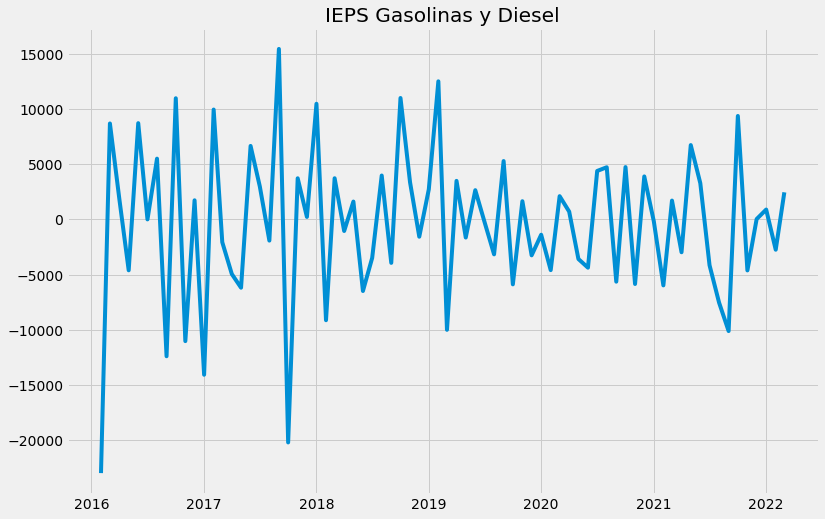

In [66]:
plt.plot(df_diff)
plt.title('IEPS Gasolinas y Diesel')
#plt.savefig('diffplot')
plt.show()

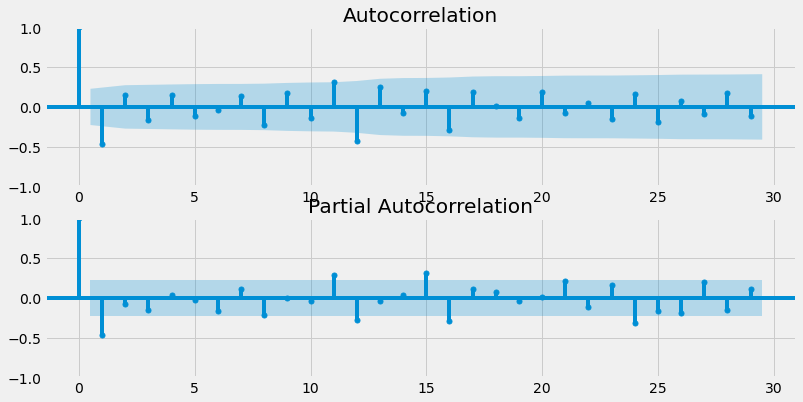

In [67]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6), sharex=False, sharey=False)
ax1 = plot_acf(df_diff, lags=29, ax=ax1)
ax2 = plot_pacf(df_diff, lags=29, ax=ax2)
#plt.savefig('acfpacf2')
plt.show()

In [68]:
model = pm.auto_arima(ieps_gas, seasonal=True, m=12, trend='c', 
                      start_p=0, start_q=0, max_order=12, test='adf', stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1710.524, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1708.312, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1701.241, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1698.217, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1708.312, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1700.682, Time=0.04 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1702.943, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1702.005, Time=0.08 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1701.105, Time=0.60 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1708.611, Time=0.03 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1703.763, Time=0.08 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=1704.755, Time=0.06 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1698.947, Time=0.20 sec
 ARIMA(1,1,2)(0,0,1)[12]

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   87
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -845.109
Date:                            Thu, 24 Mar 2022   AIC                           1698.217
Time:                                    22:32:42   BIC                           1708.035
Sample:                                         0   HQIC                          1702.168
                                             - 87                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     77.7911    276.365      0.281      0.778    -463.875     619.457
ma.L1         -0.3961      0.111     -3.557      0.000      -0.614      -0.178
ma.S.L12      -0.1323      0.141     -0.936      0.349      -0.409       0.145
sigma2      1.932e+07   2.09e+06      9.261      0.000    1.52e+07    2.34e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                26.56
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                             0.48
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
model = SARIMAX(ieps_gas,order=(0,1,1),seasonal_order=(0,0,1,12))
results = model.fit()
results.summary()

C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           ieps_gas   No. Observations:                   87
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -845.054
Date:                            Thu, 24 Mar 2022   AIC                           1696.109
Time:                                    22:32:58   BIC                           1703.472
Sample:                                01-01-2015   HQIC                          1699.072
                                     - 03-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3980      0.112     -3.549      0.000      -0.618      -0.178
ma.S.L12      -0.1310      0.143     -0.915      0.360      -0.412       0.150
sigma2      1.996e+07    2.2e+06      9.059      0.000    1.56e+07    2.43e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                26.27
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             0.48
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

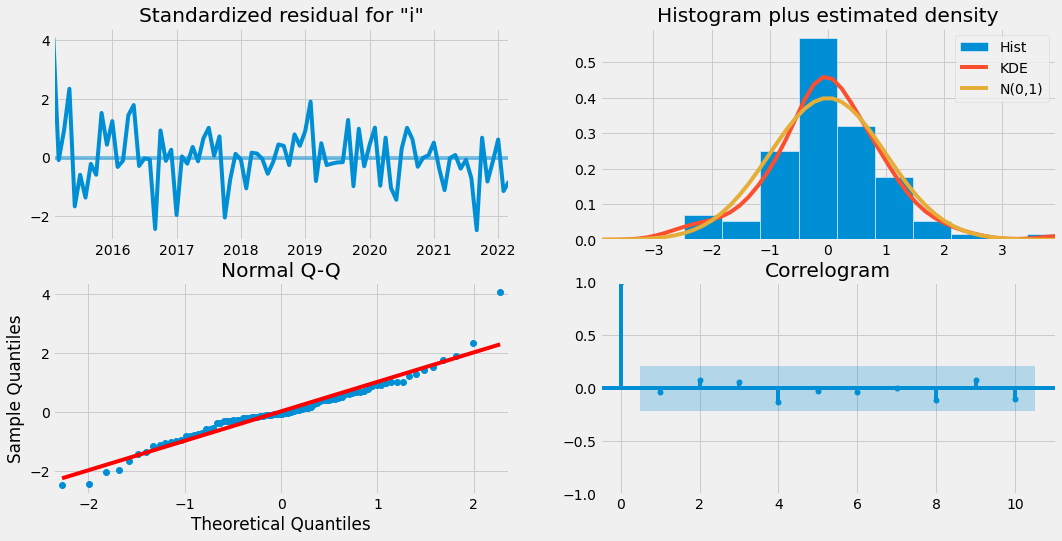

In [71]:
results.plot_diagnostics(figsize=(16, 8))
#plt.savefig('modeldiagnostics2')
plt.show()

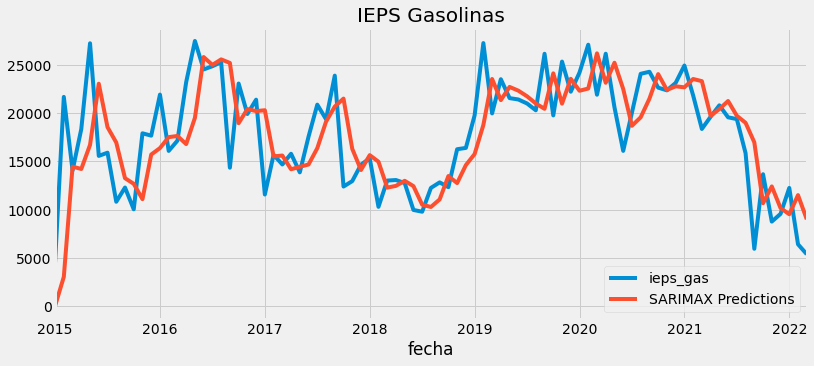

In [72]:
predictions = results.predict(start=0, end=len(ieps_gas)-1, dynamic=False, typ='levels').rename('SARIMAX Predictions')
title = 'IEPS Gasolinas'
ax = ieps_gas.plot(legend=True,figsize=(12,5),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [73]:
r2_score(ieps_gas, predictions)
evaluation_results = pd.DataFrame({'r2_score': r2_score(ieps_gas, predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(ieps_gas, predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(ieps_gas, predictions)
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - ieps_gas)/np.abs(ieps_gas))*100 

evaluation_results

r2_score  mean_absolute_error  mean_squared_error  \
0  0.358476          3217.766467        2.024774e+07   

   mean_absolute_percentage_error  
0                       21.852531

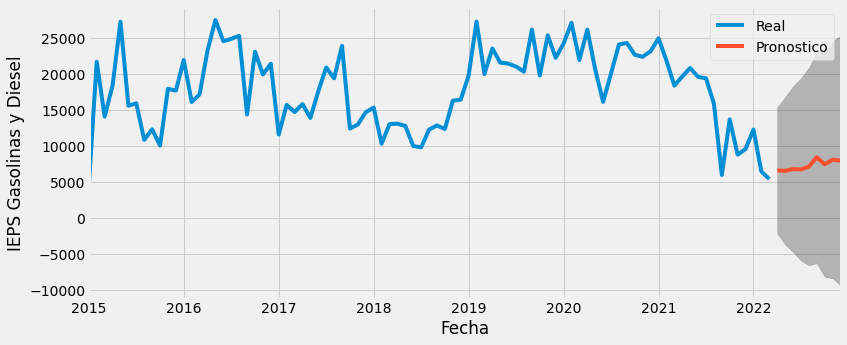

In [74]:
pred_f = results.get_forecast(steps=9)
pred_ci = pred_f.conf_int()
ax = ieps_gas.plot(label='Real', figsize=(12, 5))
pred_f.predicted_mean.plot(ax=ax, label='Pronostico')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('IEPS Gasolinas y Diesel')
plt.legend()
plt.show()

In [75]:
x=pred_f.predicted_mean
x.to_csv('arima_iepsgas.csv')

### 4.5 IEPS Bebidas Saborizadas

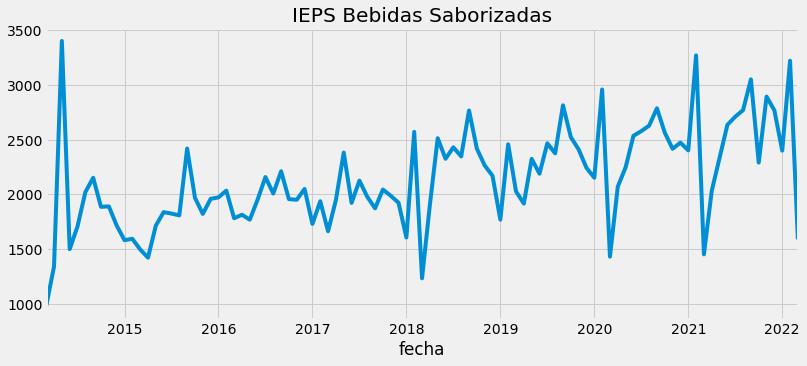

In [76]:
ieps_bebidassabp=df['ieps_bebidassab']
ieps_bebidassab=ieps_bebidassabp.dropna()
ieps_bebidassab.plot(figsize=(12,5))
plt.title('IEPS Bebidas Saborizadas')
plt.show()

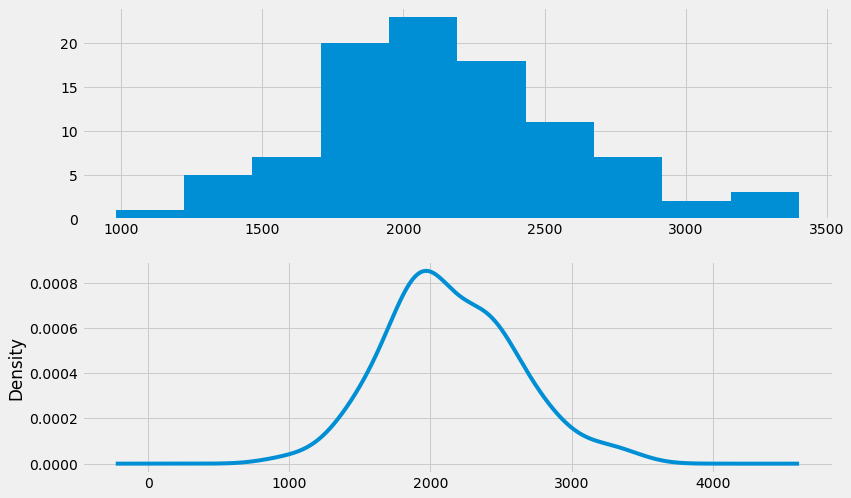

In [77]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,8))
ieps_bebidassab.hist(ax=ax1)
ieps_bebidassab.plot(kind='kde',ax=ax2)
plt.show()

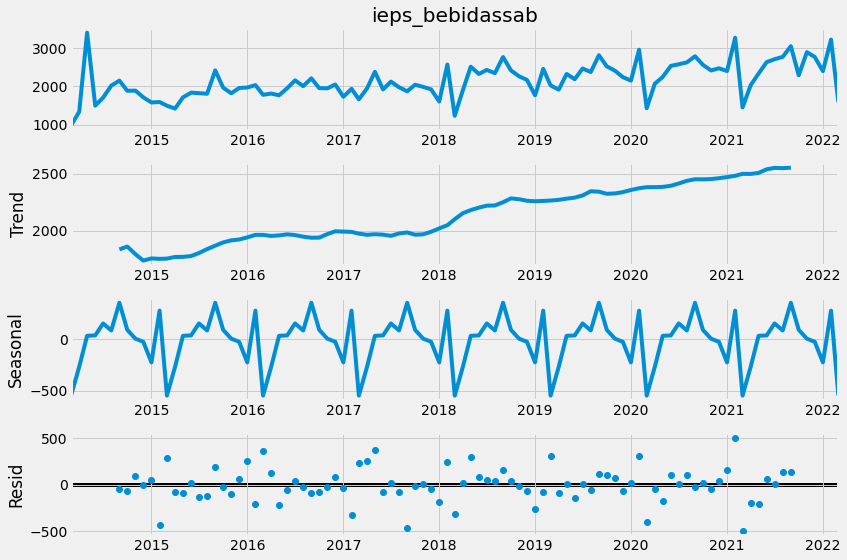

In [78]:
decomposition = seasonal_decompose(ieps_bebidassab, model='additive')
plt.rcParams['figure.figsize'] = 12, 8
decomposition.plot()
plt.show();

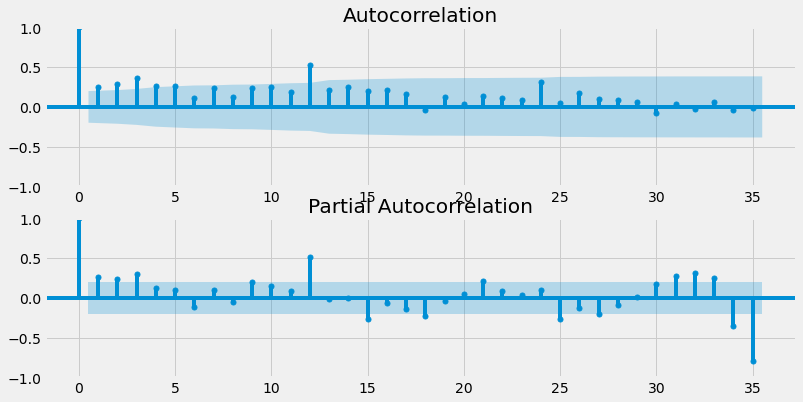

In [79]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6), sharex=False, sharey=False)
ax1 = plot_acf(ieps_bebidassab, lags=35, ax=ax1)
ax2 = plot_pacf(ieps_bebidassab, lags=35, ax=ax2)
plt.show()

In [80]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ieps_bebidassab)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -0.077283
p-value                         0.951655
#Lags Used                     11.000000
Number of Observations Used    85.000000
Critical Value (1%)            -3.509736
Critical Value (5%)            -2.896195
Critical Value (10%)           -2.585258
dtype: float64


In [81]:
df_diff = ieps_bebidassab.diff().diff(12)
df_diff.dropna(inplace=True)
df_diff.tail()

fecha
2021-11-01    749.890981
2021-12-01   -182.372961
2022-01-01   -296.472945
2022-02-01    -46.700773
2022-03-01    185.924277
Name: ieps_bebidassab, dtype: float64

In [82]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_diff)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.006664e+00
p-value                        7.093171e-10
#Lags Used                     4.000000e+00
Number of Observations Used    7.900000e+01
Critical Value (1%)           -3.515977e+00
Critical Value (5%)           -2.898886e+00
Critical Value (10%)          -2.586694e+00
dtype: float64


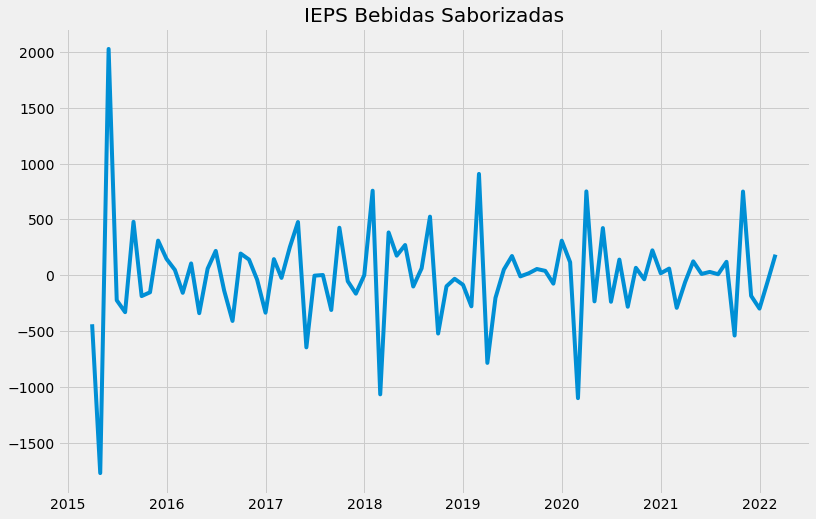

In [83]:
plt.plot(df_diff)
plt.title('IEPS Bebidas Saborizadas')
#plt.savefig('diffplot')
plt.show()

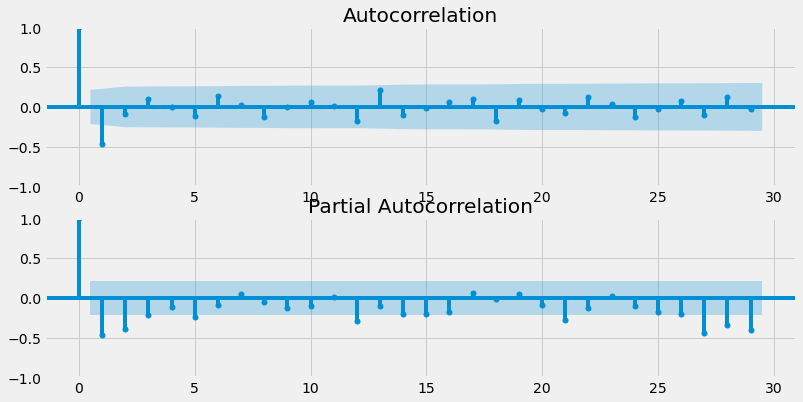

In [84]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6), sharex=False, sharey=False)
ax1 = plot_acf(df_diff, lags=29, ax=ax1)
ax2 = plot_pacf(df_diff, lags=29, ax=ax2)
#plt.savefig('acfpacf2')
plt.show()

In [85]:
model = pm.auto_arima(ieps_bebidassab, d=1, D=1,
                      seasonal=True, m=12, trend='c', 
                      start_p=0, start_q=0, max_order=9, test='adf', stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1261.672, Time=0.30 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1269.405, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1247.944, Time=0.36 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1251.569, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1240.526, Time=0.55 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1241.729, Time=0.76 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1243.789, Time=0.50 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1258.813, Time=0.43 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1225.931, Time=0.64 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1229.702, Time=0.53 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=1227.236, Time=1.59 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=1227.368, Time=0.62 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=1221.638, Time=0.80 sec
 ARIMA(3,1,0)(1,1,0)[12]

In [86]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   97
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -600.997
Date:                            Thu, 24 Mar 2022   AIC                           1219.994
Time:                                    22:34:13   BIC                           1241.872
Sample:                                         0   HQIC                          1228.789
                                             - 97                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.0791     48.157      0.209      0.834     -84.308     104.466
ar.L1         -0.8953      0.125     -7.148      0.000      -1.141      -0.650
ar.L2         -0.8734      0.170     -5.146      0.000      -1.206      -0.541
ar.L3         -0.6061      0.191     -3.167      0.002      -0.981      -0.231
ar.L4         -0.3841      0.184     -2.091      0.037      -0.744      -0.024
ar.L5         -0.2393      0.156     -1.536      0.125      -0.545       0.066
ar.S.L12      -0.4421      0.109     -4.070      0.000      -0.655      -0.229
ar.S.L24      -0.2980      0.128     -2.327      0.020      -0.549      -0.047
sigma2       9.21e+04   1.36e+04      6.783      0.000    6.55e+04    1.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):               114.48
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                            -1.38
Prob(H) (two-sided):                  0.08   Kurtosis:                         8.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
model = SARIMAX(ieps_bebidassab,order=(5,1,0),seasonal_order=(2,1,0,12))
results = model.fit()
results.summary()

C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    ieps_bebidassab   No. Observations:                   97
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -601.038
Date:                            Thu, 24 Mar 2022   AIC                           1218.077
Time:                                    22:35:51   BIC                           1237.523
Sample:                                03-01-2014   HQIC                          1225.894
                                     - 03-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8933      0.123     -7.240      0.000      -1.135      -0.651
ar.L2         -0.8692      0.169     -5.158      0.000      -1.199      -0.539
ar.L3         -0.6020      0.182     -3.305      0.001      -0.959      -0.245
ar.L4         -0.3812      0.172     -2.210      0.027      -0.719      -0.043
ar.L5         -0.2382      0.151     -1.579      0.114      -0.534       0.058
ar.S.L12      -0.4423      0.108     -4.105      0.000      -0.653      -0.231
ar.S.L24      -0.2983      0.127     -2.341      0.019      -0.548      -0.049
sigma2      9.224e+04   1.36e+04      6.788      0.000    6.56e+04    1.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               120.09
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                            -1.41
Prob(H) (two-sided):                  0.07   Kurtosis:                         8.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

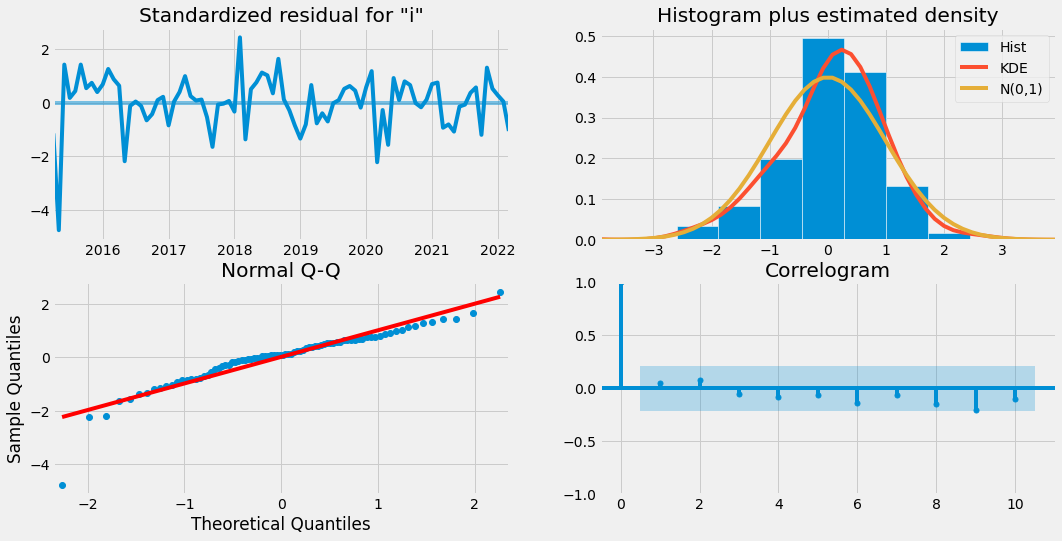

In [88]:
results.plot_diagnostics(figsize=(16, 8))
#plt.savefig('modeldiagnostics2')
plt.show()

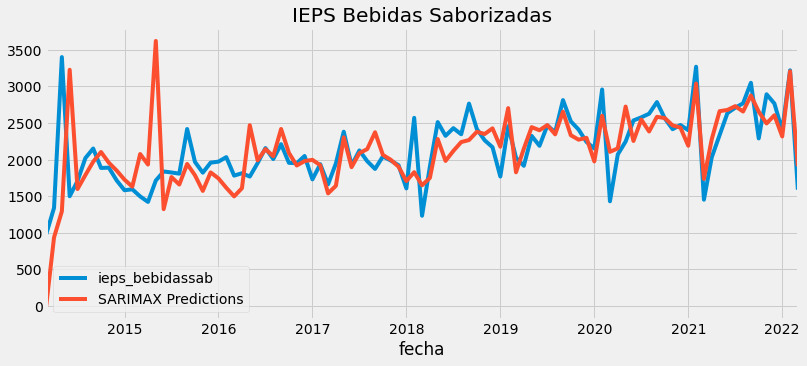

In [89]:
predictions = results.predict(start=0, end=len(ieps_bebidassab)-1, dynamic=False, typ='levels').rename('SARIMAX Predictions')
title = 'IEPS Bebidas Saborizadas'
ax = ieps_bebidassab.plot(legend=True,figsize=(12,5),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [90]:
r2_score(ieps_bebidassab, predictions)
evaluation_results = pd.DataFrame({'r2_score': r2_score(ieps_bebidassab, predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(ieps_bebidassab, predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(ieps_bebidassab, predictions)
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - ieps_bebidassab)/np.abs(ieps_bebidassab))*100 

evaluation_results

r2_score  mean_absolute_error  mean_squared_error  \
0  0.071426           267.372088       192457.309172   

   mean_absolute_percentage_error  
0                       13.974829

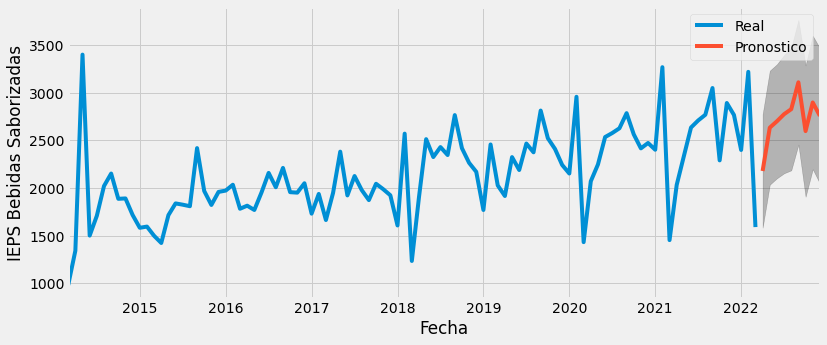

In [91]:
pred_f = results.get_forecast(steps=9)
pred_ci = pred_f.conf_int()
ax = ieps_bebidassab.plot(label='Real', figsize=(12, 5))
pred_f.predicted_mean.plot(ax=ax, label='Pronostico')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('IEPS Bebidas Saborizadas')
plt.legend()
plt.show()

In [92]:
x=pred_f.predicted_mean
x.to_csv('arima_iepsbebidassab.csv')

### 4.6 IEPS Alimentos

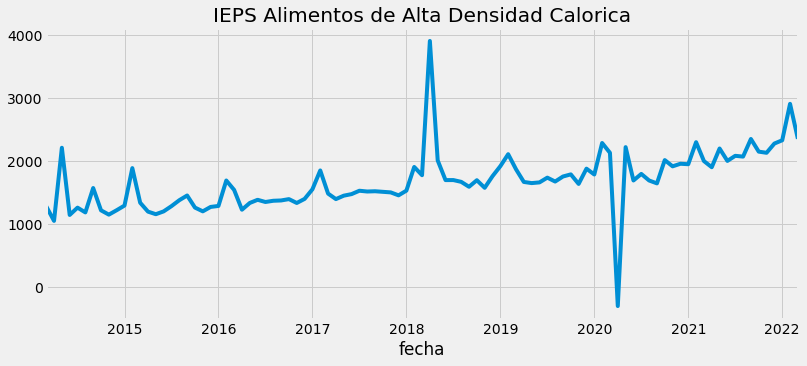

In [93]:
ieps_alimentosp=df['ieps_alimentos']
ieps_alimentos=ieps_alimentosp.dropna()
ieps_alimentos.plot(figsize=(12,5))
plt.title('IEPS Alimentos de Alta Densidad Calorica')
plt.show()

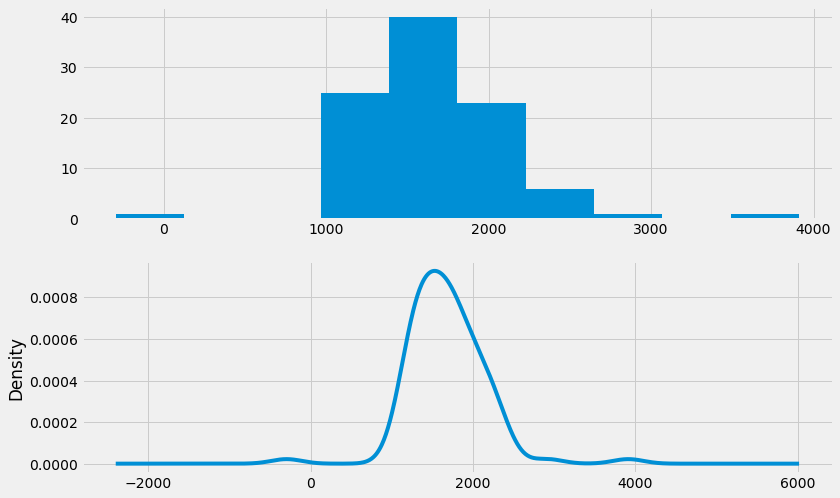

In [94]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,8))
ieps_alimentos.hist(ax=ax1)
ieps_alimentos.plot(kind='kde',ax=ax2)
plt.show()

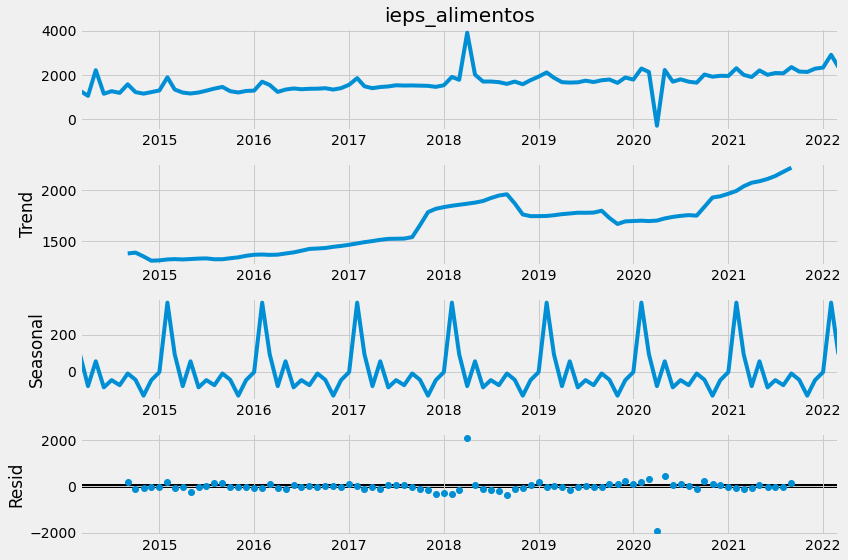

In [95]:
decomposition = seasonal_decompose(ieps_alimentos, model='additive')
plt.rcParams['figure.figsize'] = 12, 8
decomposition.plot()
plt.show();

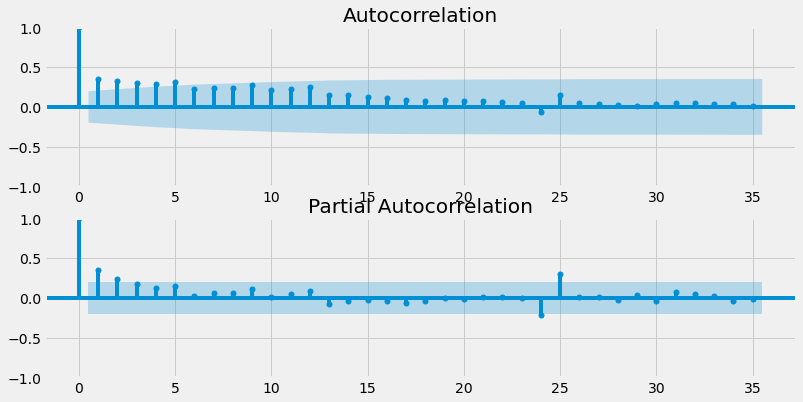

In [96]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6), sharex=False, sharey=False)
ax1 = plot_acf(ieps_alimentos, lags=35, ax=ax1)
ax2 = plot_pacf(ieps_alimentos, lags=35, ax=ax2)
plt.show()

In [97]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ieps_alimentos)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -1.418738
p-value                         0.573261
#Lags Used                      4.000000
Number of Observations Used    92.000000
Critical Value (1%)            -3.503515
Critical Value (5%)            -2.893508
Critical Value (10%)           -2.583824
dtype: float64


In [98]:
df_diff = ieps_alimentos.diff().diff(12)
df_diff.dropna(inplace=True)
df_diff.tail()

fecha
2021-11-01     81.036190
2021-12-01    105.772044
2022-01-01     59.158136
2022-02-01    228.920272
2022-03-01   -256.366656
Name: ieps_alimentos, dtype: float64

In [99]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_diff)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.958748e+00
p-value                        2.987903e-12
#Lags Used                     3.000000e+00
Number of Observations Used    8.000000e+01
Critical Value (1%)           -3.514869e+00
Critical Value (5%)           -2.898409e+00
Critical Value (10%)          -2.586439e+00
dtype: float64


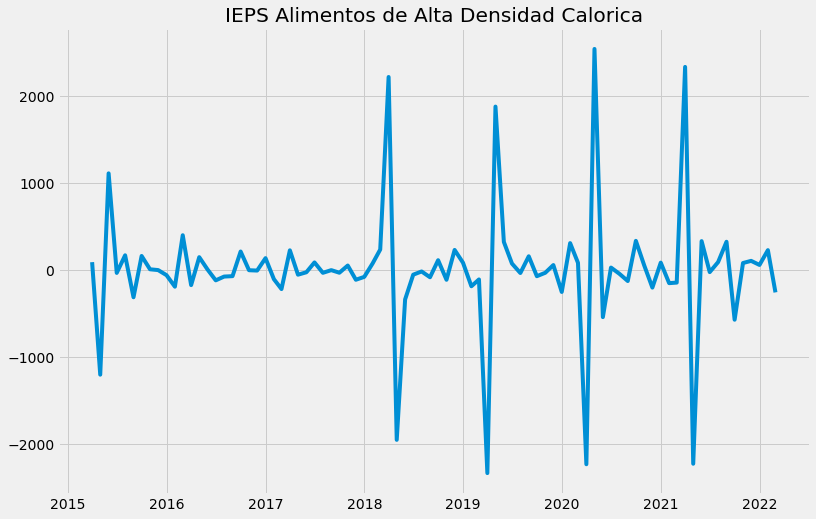

In [100]:
plt.plot(df_diff)
plt.title('IEPS Alimentos de Alta Densidad Calorica')
#plt.savefig('diffplot')
plt.show()

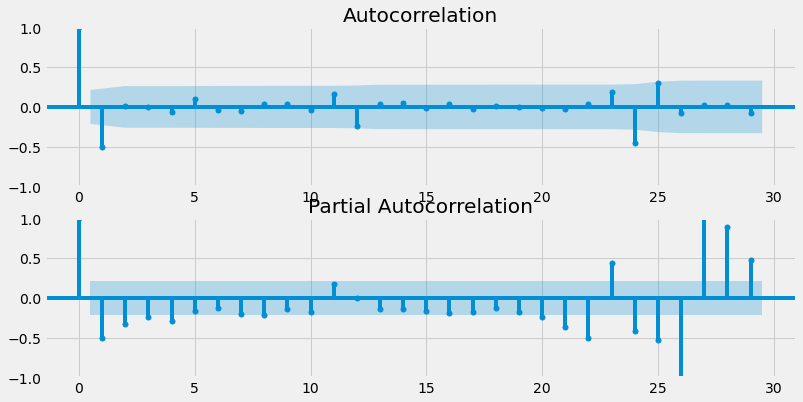

In [101]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6), sharex=False, sharey=False)
ax1 = plot_acf(df_diff, lags=29, ax=ax1)
ax2 = plot_pacf(df_diff, lags=29, ax=ax2)
#plt.savefig('acfpacf2')
plt.show()

In [102]:
model = pm.auto_arima(ieps_alimentos, seasonal=True, m=12, trend='c', 
                      start_p=0, start_q=0, max_order=12, test='adf', stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1462.532, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1472.169, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1460.673, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1455.992, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1472.169, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1465.520, Time=0.06 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1457.891, Time=0.31 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1462.417, Time=0.32 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1460.442, Time=0.15 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1451.498, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1447.736, Time=0.22 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=1457.384, Time=0.10 sec
 ARIMA(1,0,1)(1,0,1)[12] inte

In [103]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   97
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -719.868
Date:                Thu, 24 Mar 2022   AIC                           1447.736
Time:                        22:36:26   BIC                           1458.034
Sample:                             0   HQIC                          1451.900
                                 - 97                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     93.1846    137.260      0.679      0.497    -175.839     362.208
ar.L1          0.9427      0.085     11.130      0.000       0.777       1.109
ma.L1         -0.7670      0.135     -5.696      0.000      -1.031      -0.503
sigma2      1.613e+05   8863.539     18.194      0.000    1.44e+05    1.79e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):              1155.69
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               3.50   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
model = SARIMAX(ieps_alimentos,order=(1,0,1),seasonal_order=(0,0,0,12))
results = model.fit()
results.summary()

C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         ieps_alimentos   No. Observations:                   97
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -720.830
Date:                Thu, 24 Mar 2022   AIC                           1447.660
Time:                        22:36:44   BIC                           1455.384
Sample:                    03-01-2014   HQIC                          1450.783
                         - 03-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9994      0.002    518.431      0.000       0.996       1.003
ma.L1         -0.8430      0.060    -13.981      0.000      -0.961      -0.725
sigma2      1.595e+05   7133.309     22.362      0.000    1.46e+05    1.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):              1588.51
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               3.59   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

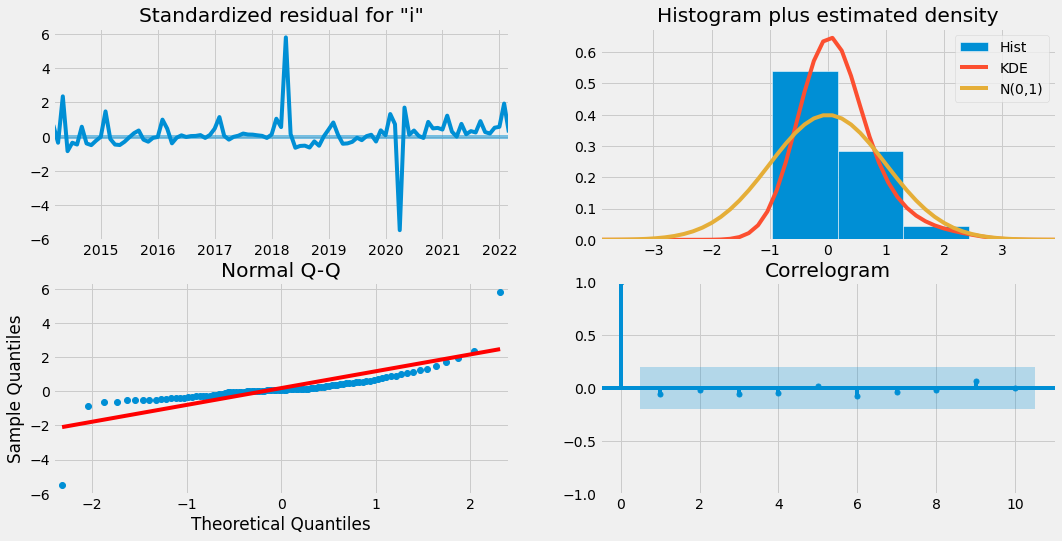

In [105]:
results.plot_diagnostics(figsize=(16, 8))
#plt.savefig('modeldiagnostics2')
plt.show()

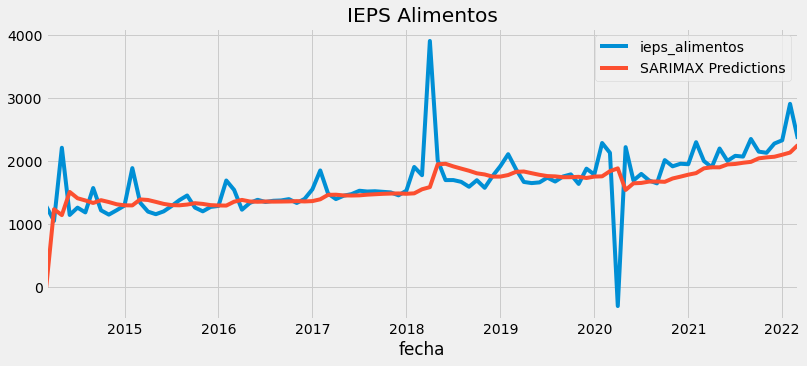

In [106]:
predictions = results.predict(start=0, end=len(ieps_alimentos)-1, dynamic=False, typ='levels').rename('SARIMAX Predictions')
title = 'IEPS Alimentos'
ax = ieps_alimentos.plot(legend=True,figsize=(12,5),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [107]:
r2_score(ieps_alimentos, predictions)
evaluation_results = pd.DataFrame({'r2_score': r2_score(ieps_alimentos, predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(ieps_alimentos, predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(ieps_alimentos, predictions)
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - ieps_alimentos)/np.abs(ieps_alimentos))*100 

evaluation_results

r2_score  mean_absolute_error  mean_squared_error  \
0   0.18386           218.137131       178924.206268   

   mean_absolute_percentage_error  
0                       18.166961

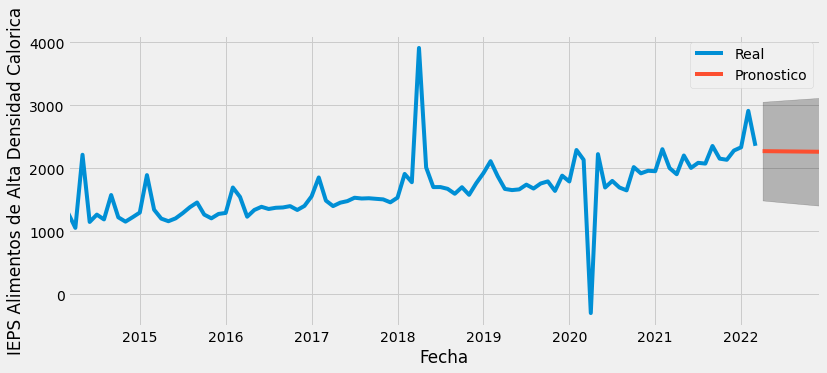

In [108]:
pred_f = results.get_forecast(steps=9)
pred_ci = pred_f.conf_int()
ax = ieps_alimentos.plot(label='Real', figsize=(12, 5))
pred_f.predicted_mean.plot(ax=ax, label='Pronostico')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('IEPS Alimentos de Alta Densidad Calorica')
plt.legend()
plt.show()

In [109]:
x=pred_f.predicted_mean
x.to_csv('arima_iepsalimentos.csv')

### 4.7 Impuesto a la Importación

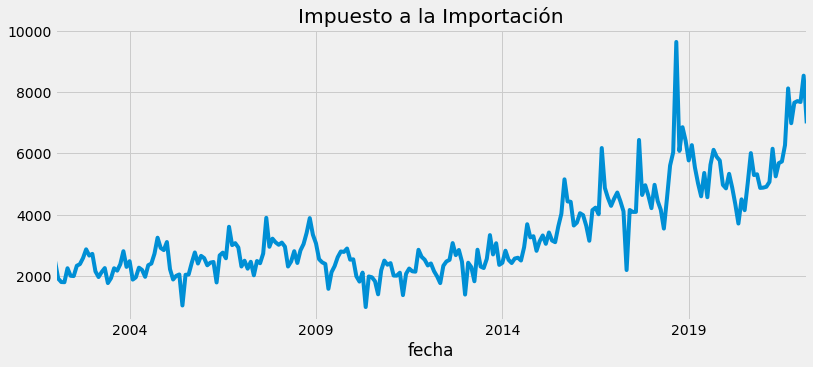

In [110]:
importacionp=df['importacion']
importacion=importacionp.dropna()
importacion.plot(figsize=(12,5))
plt.title('Impuesto a la Importación')
plt.show()

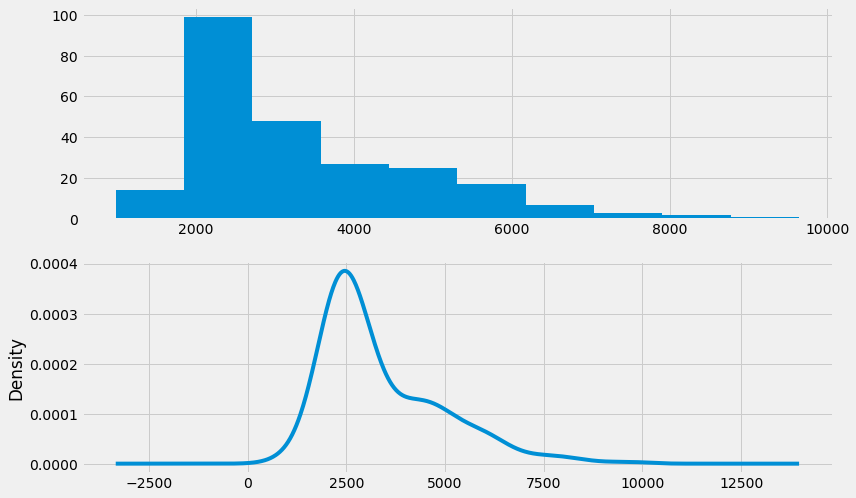

In [111]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,8))
importacion.hist(ax=ax1)
importacion.plot(kind='kde',ax=ax2)
plt.show()

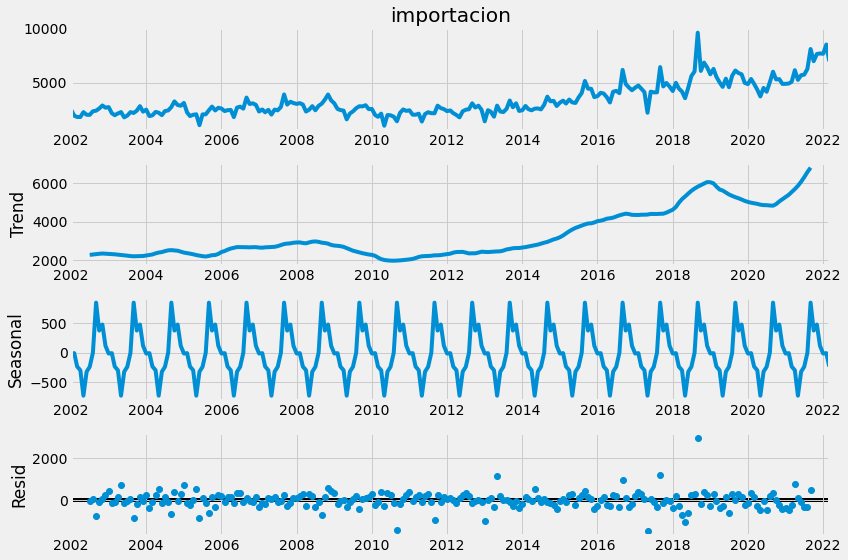

In [112]:
decomposition = seasonal_decompose(importacion, model='additive')
plt.rcParams['figure.figsize'] = 12, 8
decomposition.plot()
plt.show();

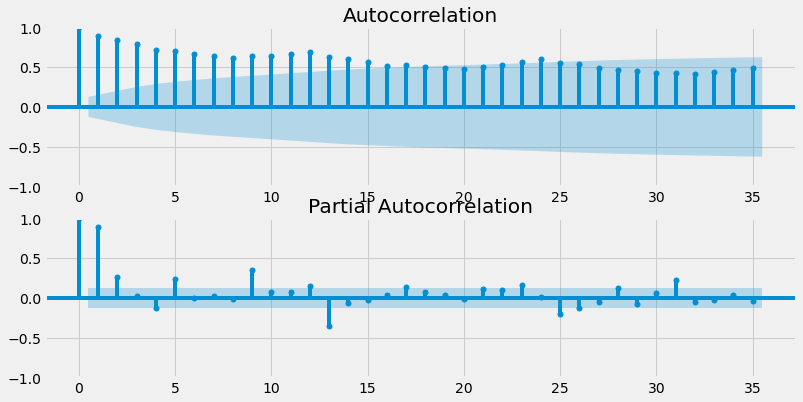

In [113]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6), sharex=False, sharey=False)
ax1 = plot_acf(importacion, lags=35, ax=ax1)
ax2 = plot_pacf(importacion, lags=35, ax=ax2)
plt.show()

In [114]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(importacion)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.589799
p-value                          0.987361
#Lags Used                      13.000000
Number of Observations Used    229.000000
Critical Value (1%)             -3.459233
Critical Value (5%)             -2.874245
Critical Value (10%)            -2.573541
dtype: float64


In [115]:
df_diff = importacion.diff().diff(12)
df_diff.dropna(inplace=True)
df_diff.tail()

fecha
2021-11-01     643.400409
2021-12-01     497.293963
2022-01-01     -37.950627
2022-02-01     830.547630
2022-03-01   -1716.021799
Name: importacion, dtype: float64

In [116]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_diff)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -5.328225
p-value                          0.000005
#Lags Used                      15.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64


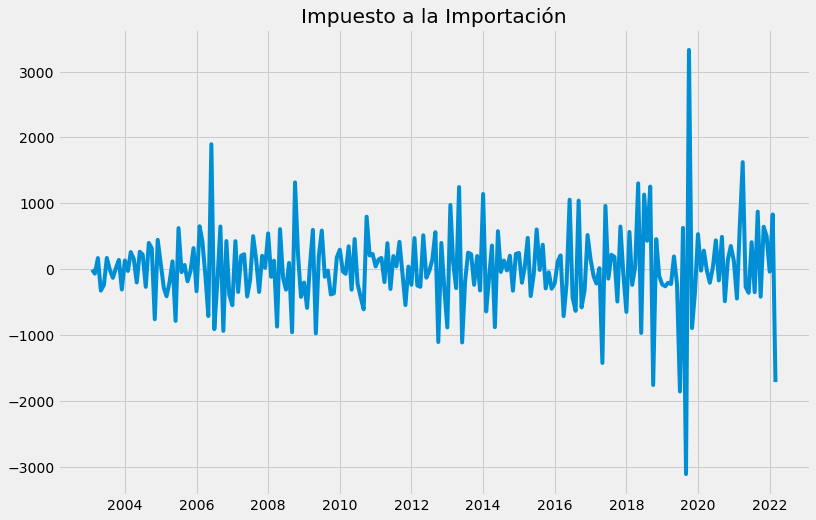

In [117]:
plt.plot(df_diff)
plt.title('Impuesto a la Importación')
#plt.savefig('diffplot')
plt.show()

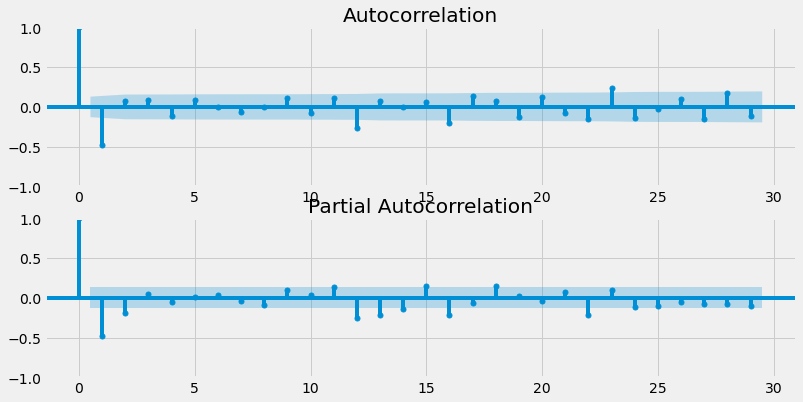

In [118]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6), sharex=False, sharey=False)
ax1 = plot_acf(df_diff, lags=29, ax=ax1)
ax2 = plot_pacf(df_diff, lags=29, ax=ax2)
#plt.savefig('acfpacf2')
plt.show()

In [119]:
model = pm.auto_arima(importacion, seasonal=True, m=12, trend='c', 
                      start_p=0, start_q=0, max_order=12, test='adf', stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=3747.162, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3839.027, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3694.794, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3729.105, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3839.027, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3801.468, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3691.954, Time=0.60 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3688.831, Time=1.40 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3690.107, Time=0.58 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.18 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3689.406, Time=1.40 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=3744.288, Time=1.47 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=3680.873, Time=1.36 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=3680.834, Time=0.91 sec
 ARIMA(2,1,0)(0,0,1)[12]

In [120]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  243
Model:             SARIMAX(4, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1831.811
Date:                              Thu, 24 Mar 2022   AIC                           3679.622
Time:                                      22:38:04   BIC                           3707.533
Sample:                                           0   HQIC                          3690.866
                                              - 243                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.0717     17.611      0.515      0.606     -25.446      43.590
ar.L1         -0.5413      0.054    -10.033      0.000      -0.647      -0.436
ar.L2         -0.1853      0.064     -2.908      0.004      -0.310      -0.060
ar.L3          0.0283      0.073      0.389      0.697      -0.114       0.171
ar.L4         -0.1183      0.073     -1.626      0.104      -0.261       0.024
ar.S.L12       0.8531      0.058     14.789      0.000       0.740       0.966
ma.S.L12      -0.4286      0.103     -4.157      0.000      -0.631      -0.227
sigma2      2.125e+05   1.27e+04     16.675      0.000    1.87e+05    2.37e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               252.80
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               3.79   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [121]:
model = SARIMAX(importacion,order=(4,1,0),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          importacion   No. Observations:                  243
Model:             SARIMAX(4, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1832.021
Date:                              Thu, 24 Mar 2022   AIC                           3678.042
Time:                                      22:38:23   BIC                           3702.465
Sample:                                  01-01-2002   HQIC                          3687.880
                                       - 03-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5395      0.054    -10.049      0.000      -0.645      -0.434
ar.L2         -0.1827      0.064     -2.870      0.004      -0.307      -0.058
ar.L3          0.0315      0.072      0.435      0.664      -0.110       0.173
ar.L4         -0.1163      0.073     -1.591      0.112      -0.260       0.027
ar.S.L12       0.8561      0.056     15.300      0.000       0.746       0.966
ma.S.L12      -0.4325      0.102     -4.257      0.000      -0.632      -0.233
sigma2      2.128e+05   1.28e+04     16.636      0.000    1.88e+05    2.38e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               248.66
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               3.82   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

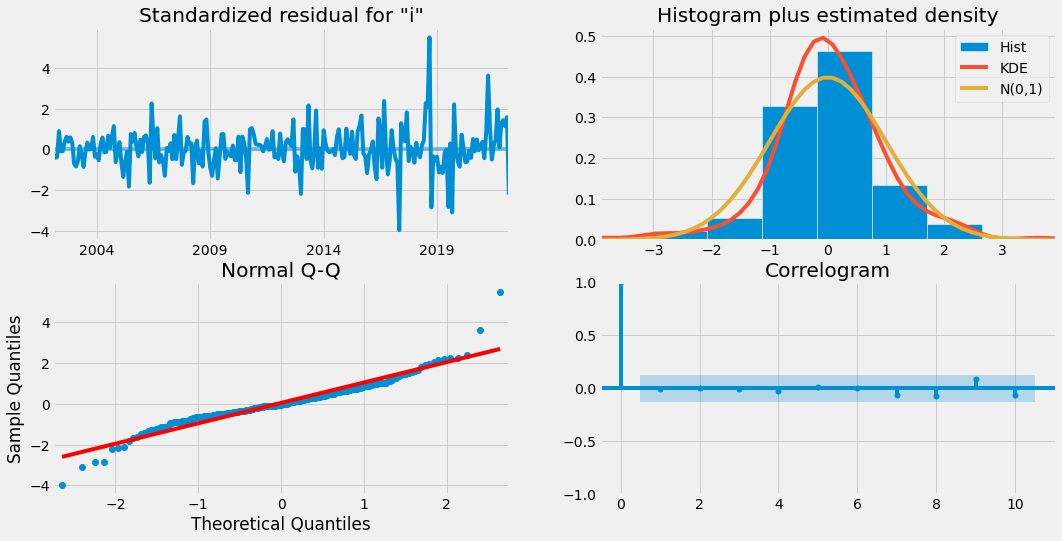

In [122]:
results.plot_diagnostics(figsize=(16, 8))
#plt.savefig('modeldiagnostics2')
plt.show()

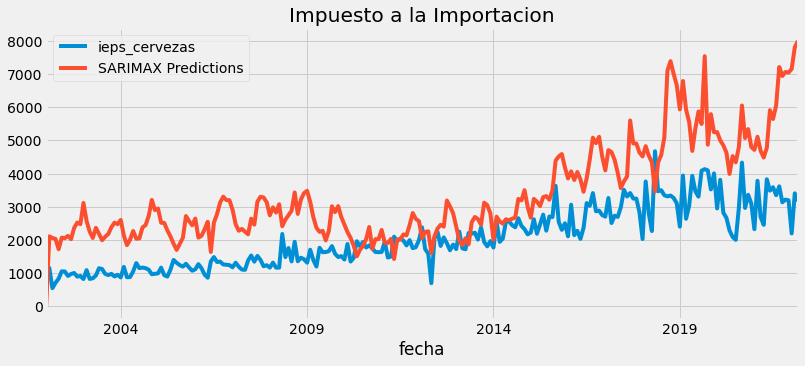

In [123]:
predictions = results.predict(start=0, end=len(importacion)-1, dynamic=False, typ='levels').rename('SARIMAX Predictions')
title = 'Impuesto a la Importacion'
ax = ieps_cervezas.plot(legend=True,figsize=(12,5),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [124]:
r2_score(importacion, predictions)
evaluation_results = pd.DataFrame({'r2_score': r2_score(importacion, predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(importacion, predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(importacion, predictions)
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - importacion)/np.abs(importacion))*100 

evaluation_results

r2_score  mean_absolute_error  mean_squared_error  \
0  0.895182           334.147239       240022.715088   

   mean_absolute_percentage_error  
0                       11.073048

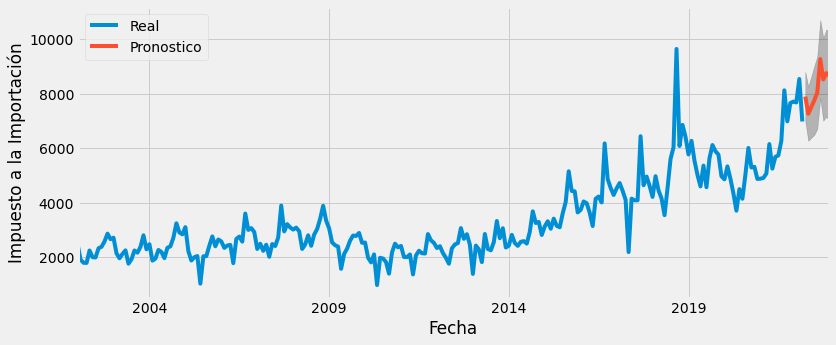

In [125]:
pred_f = results.get_forecast(steps=9)
pred_ci = pred_f.conf_int()
ax = importacion.plot(label='Real', figsize=(12, 5))
pred_f.predicted_mean.plot(ax=ax, label='Pronostico')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Impuesto a la Importación')
plt.legend()
plt.show()

In [126]:
x=pred_f.predicted_mean
x.to_csv('arima_importacion.csv')

### 4.8 Ingresos Petroleros / RFP Petroleros

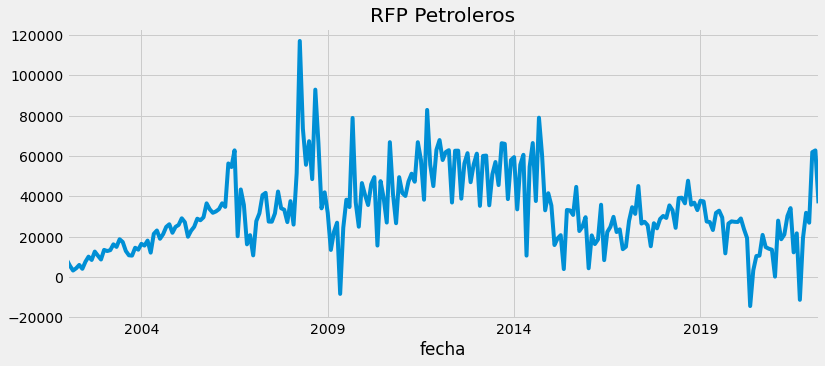

In [127]:
fmpedp=df['rfp_petroleros']
fmped=fmpedp.dropna()
fmped.plot(figsize=(12,5))
plt.title('RFP Petroleros')
plt.show()

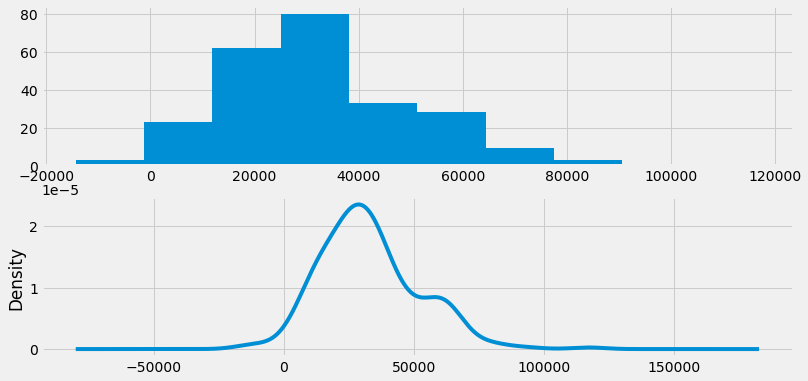

In [128]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,6))
fmped.hist(ax=ax1)
fmped.plot(kind='kde',ax=ax2)
plt.show()

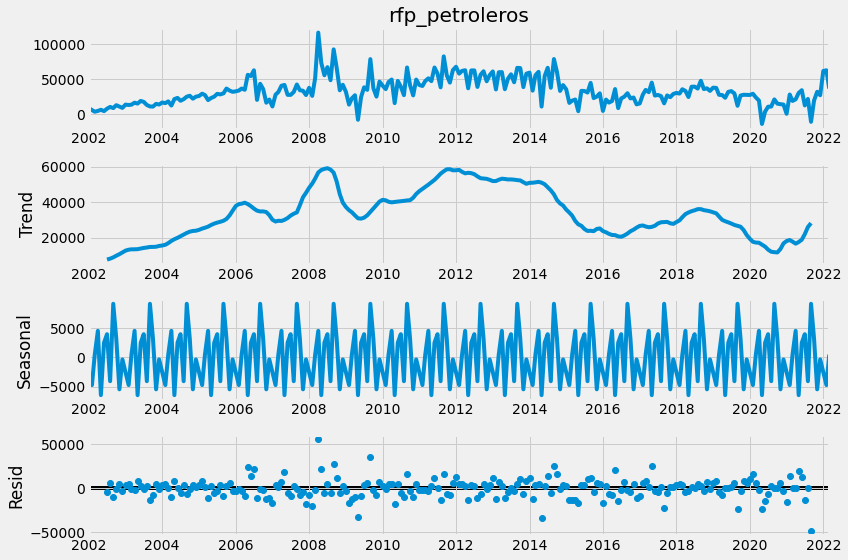

In [129]:
decomposition = seasonal_decompose(fmped, model='additive')
plt.rcParams['figure.figsize'] = 12, 8
decomposition.plot()
plt.show();

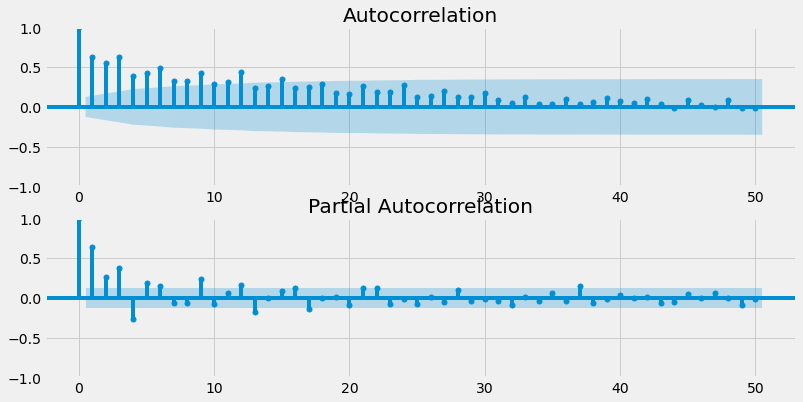

In [130]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6), sharex=False, sharey=False)
ax1 = plot_acf(fmped, lags=50, ax=ax1)
ax2 = plot_pacf(fmped, lags=50, ax=ax2)
plt.show()

In [131]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(fmped)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.555546
p-value                          0.102537
#Lags Used                      12.000000
Number of Observations Used    230.000000
Critical Value (1%)             -3.459106
Critical Value (5%)             -2.874190
Critical Value (10%)            -2.573512
dtype: float64


In [132]:
df_diff = fmped.diff().diff(12)
df_diff.dropna(inplace=True)
df_diff.tail()

fecha
2021-11-01    13338.433520
2021-12-01    -4417.820260
2022-01-01    48271.272533
2022-02-01   -26856.230503
2022-03-01   -17014.798330
Name: rfp_petroleros, dtype: float64

In [133]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_diff)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.262558e+00
p-value                        4.188778e-08
#Lags Used                     1.500000e+01
Number of Observations Used    2.140000e+02
Critical Value (1%)           -3.461282e+00
Critical Value (5%)           -2.875143e+00
Critical Value (10%)          -2.574020e+00
dtype: float64


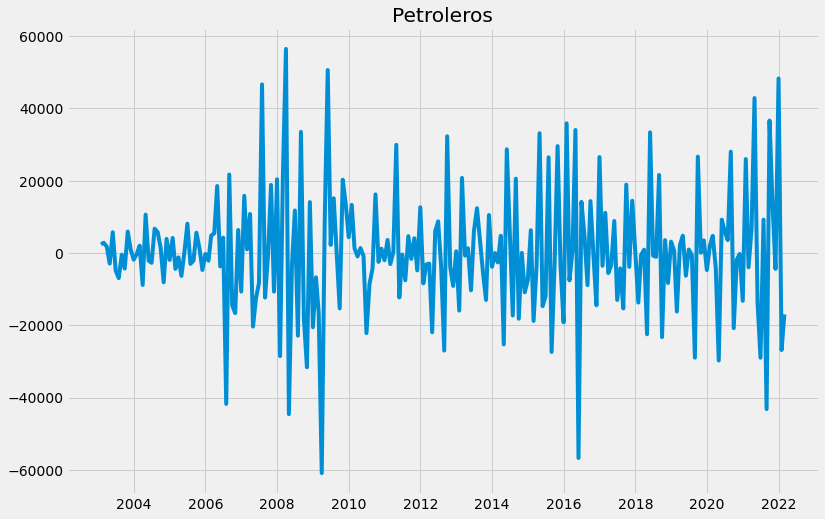

In [134]:
plt.plot(df_diff)
plt.title('Petroleros')
#plt.savefig('diffplot')
plt.show()

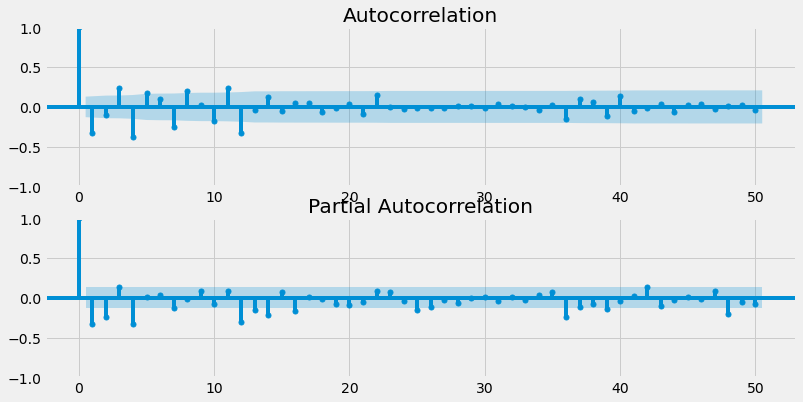

In [135]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6), sharex=False, sharey=False)
ax1 = plot_acf(df_diff, lags=50, ax=ax1)
ax2 = plot_pacf(df_diff, lags=50, ax=ax2)
#plt.savefig('acfpacf2')
plt.show()

In [136]:
model = pm.auto_arima(fmped, seasonal=True, m=12, trend='c', 
                      start_p=0, start_q=0, max_order=12, test='adf', stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=5327.304, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5384.046, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5304.101, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5296.766, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5384.046, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5312.150, Time=0.05 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=5289.677, Time=0.20 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=5290.152, Time=0.12 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=5290.543, Time=0.63 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=5291.671, Time=0.41 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=5289.107, Time=0.24 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=5336.536, Time=0.23 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=5288.577, Time=0.39 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=5297.017, Time=0.17 sec
 ARIMA(1,1,1)(1,0,2

In [137]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  243
Model:             SARIMAX(2, 1, 4)x(0, 0, [1, 2], 12)   Log Likelihood               -2609.266
Date:                                 Thu, 24 Mar 2022   AIC                           5238.533
Time:                                         22:39:46   BIC                           5273.422
Sample:                                              0   HQIC                          5252.587
                                                 - 243                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    364.5462   1401.639      0.260      0.795   -2382.615    3111.708
ar.L1         -0.9331      0.067    -13.942      0.000      -1.064      -0.802
ar.L2         -0.8623      0.070    -12.272      0.000      -1.000      -0.725
ma.L1          0.5196      0.078      6.651      0.000       0.367       0.673
ma.L2          0.2955      0.086      3.453      0.001       0.128       0.463
ma.L3         -0.3969      0.080     -4.938      0.000      -0.554      -0.239
ma.L4         -0.3695      0.073     -5.074      0.000      -0.512      -0.227
ma.S.L12       0.1943      0.084      2.314      0.021       0.030       0.359
ma.S.L24       0.1738      0.088      1.984      0.047       0.002       0.345
sigma2      1.614e+08      0.005   3.13e+10      0.000    1.61e+08    1.61e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               227.33
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.44
Prob(H) (two-sided):                  0.73   Kurtosis:                         7.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.94e+26. Standard errors may be unstable.
"""

In [138]:
model = SARIMAX(fmped,order=(2,1,4),seasonal_order=(0,0,2,12))
results = model.fit()
results.summary()

C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                          rfp_petroleros   No. Observations:                  243
Model:             SARIMAX(2, 1, 4)x(0, 0, [1, 2], 12)   Log Likelihood               -2609.369
Date:                                 Thu, 24 Mar 2022   AIC                           5236.738
Time:                                         22:41:15   BIC                           5268.138
Sample:                                     01-01-2002   HQIC                          5249.387
                                          - 03-01-2022                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9334      0.067    -13.917      0.000      -1.065      -0.802
ar.L2         -0.8624      0.070    -12.388      0.000      -0.999      -0.726
ma.L1          0.5214      0.078      6.663      0.000       0.368       0.675
ma.L2          0.2978      0.086      3.462      0.001       0.129       0.466
ma.L3         -0.3945      0.080     -4.916      0.000      -0.552      -0.237
ma.L4         -0.3679      0.072     -5.107      0.000      -0.509      -0.227
ma.S.L12       0.1950      0.083      2.359      0.018       0.033       0.357
ma.S.L24       0.1743      0.087      2.007      0.045       0.004       0.345
sigma2      1.615e+08   2.18e-10   7.43e+17      0.000    1.62e+08    1.62e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               226.14
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.44
Prob(H) (two-sided):                  0.72   Kurtosis:                         7.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.88e+33. Standard errors may be unstable.
"""

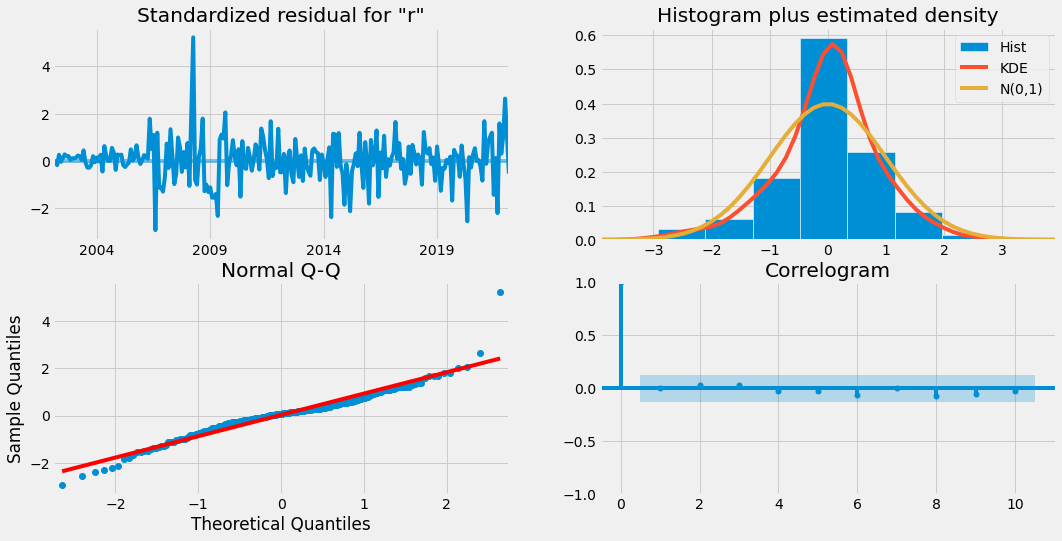

In [139]:
results.plot_diagnostics(figsize=(16, 8))
#plt.savefig('modeldiagnostics2')
plt.show()

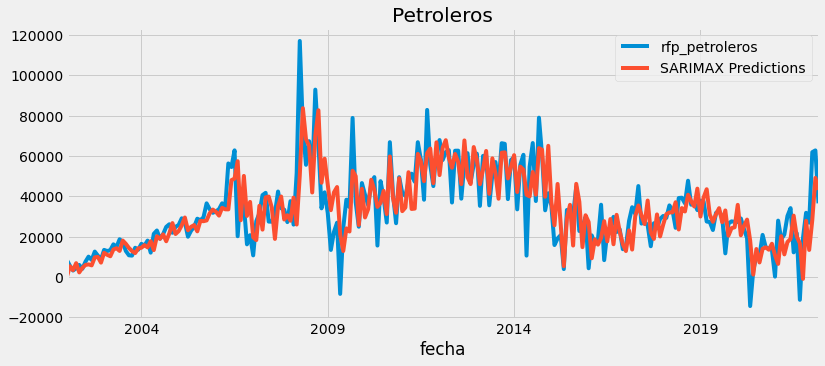

In [140]:
predictions = results.predict(start=0, end=len(fmped)-1, dynamic=False, typ='levels').rename('SARIMAX Predictions')
title = 'Petroleros'
ax = fmped.plot(legend=True,figsize=(12,5),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [141]:
r2_score(fmped, predictions)
evaluation_results = pd.DataFrame({'r2_score': r2_score(fmped, predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(fmped, predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(fmped, predictions)
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - fmped)/np.abs(fmped))*100 
evaluation_results

r2_score  mean_absolute_error  mean_squared_error  \
0  0.633591          8088.846163        1.316428e+08   

   mean_absolute_percentage_error  
0                       53.347539

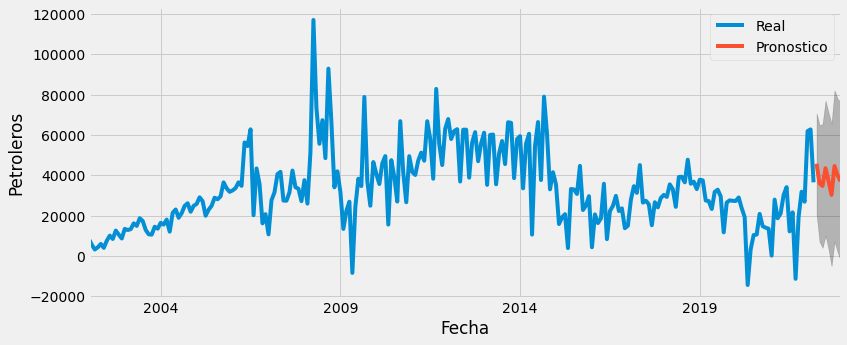

In [142]:
pred_f = results.get_forecast(steps=9)
pred_ci = pred_f.conf_int()
ax = fmped.plot(label='Real', figsize=(12, 5))
pred_f.predicted_mean.plot(ax=ax, label='Pronostico')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Petroleros')
plt.legend()
plt.show()

In [143]:
x=pred_f.predicted_mean
x.to_csv('arima_petroleros.csv')

## 5. Análisis de las Series Trimestrales

Como ya se señaló antes, el Producto Interno Bruto (PIB) resulta ser una variable adecuada para estimar el Impuesto Sobre la Renta (ISR) y el Impuesto al Valor Agregado (IVA), además de otras variables como la reforma al ISR y la tasa misma del IVA, respectivamente. Así que solo se comentaran los resultados de manera detallada para el ISR.

In [144]:
df = pd.read_csv('202203trimestrales.csv', sep=',', parse_dates=['fecha'], index_col='fecha', encoding = 'utf-8')
df['fecha']=df.index
df.tail()

ano  mes  dia       fechas     pib_real   pib_reale4         IPI  \
fecha                                                                           
2021-10-01  2021   10    1      2021/04  18220946.73  4555236.683  147.345137   
2022-01-01  2022    1    1  2022/01 /r1  17725783.91  4431445.977  154.501477   
2022-04-01  2022    4    1      2022/02  18356759.15  4589189.787  154.468340   
2022-07-01  2022    7    1      2022/03  17916069.38  4479017.345  154.942477   
2022-10-01  2022   10    1      2022/04  18585365.67  4646341.417  155.449119   

               rfp_neta          isr          iva     rfp_real     isr_real  \
fecha                                                                         
2021-10-01  1055526.753  493773.5145  286494.0861  716363.4821  335113.5471   
2022-01-01          NaN          NaN          NaN          NaN          NaN   
2022-04-01          NaN          NaN          NaN          NaN          NaN   
2022-07-01          NaN          NaN          NaN          NaN          NaN   
2022-10-01          NaN          NaN          NaN          NaN          NaN   

               iva_real  tasa iva  reformaisr  covid      fecha  
fecha                                                            
2021-10-01  194437.4224        16           1      0 2021-10-01  
2022-01-01          NaN        16           1      0 2022-01-01  
2022-04-01          NaN        16           1      0 2022-04-01  
2022-07-01          NaN        16           1      0 2022-07-01  
2022-10-01          NaN        16           1      0 2022-10-01

### 5.1 Impuesto Sobre la Renta, ISR

Una vez que tome en cuenta la serie en términos reales y el desfase de 2 meses que existe en la serie del ISR, la serie mantuvo una tendencia al alza en términos reales hasta 2017-2018, y a partir de entonces mantiene un compartamiento un poco más vólatil:

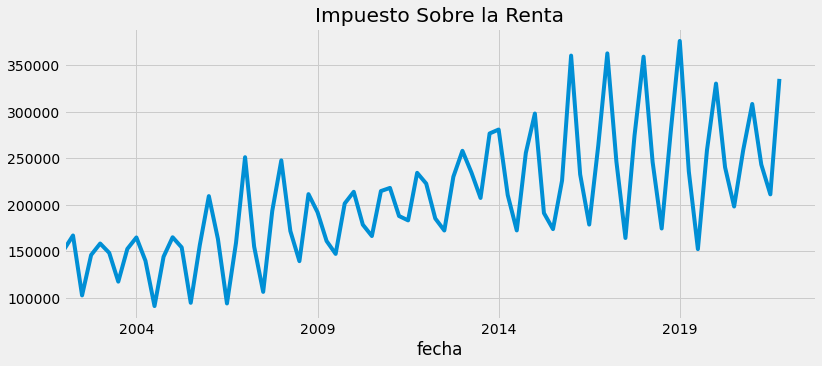

In [145]:
isrp=df['isr_real']
#isr=isrp.dropna()
isrp.plot(figsize=(12,5))
plt.title('Impuesto Sobre la Renta')
plt.show()
#isr.head()

Su histograma y función de densidad se ven como sigue:

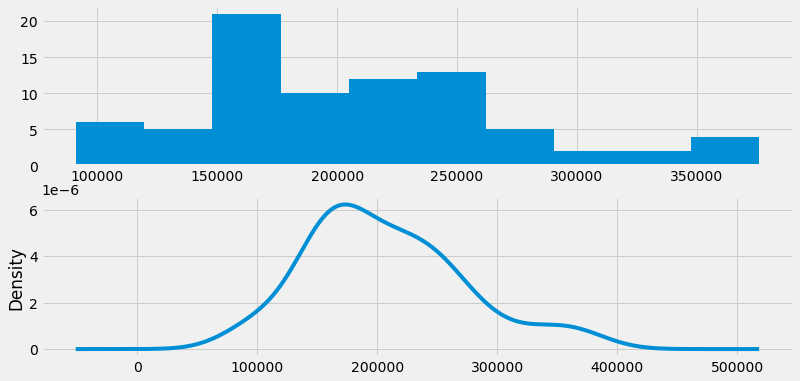

In [146]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,6))
isrp.hist(ax=ax1)
isrp.plot(kind='kde',ax=ax2)
plt.show()

La descomposición de la serie del ISR se ve como sigue:

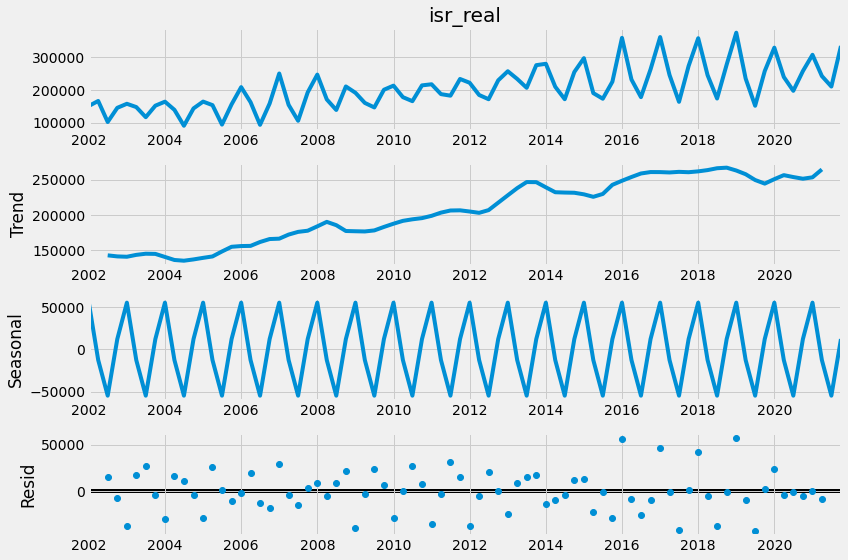

In [147]:
decomposition = seasonal_decompose(isrp.dropna(), model='additive')
plt.rcParams['figure.figsize'] = 12, 8
decomposition.plot()
plt.show()

Y debido a que la serie es trimestral, los correlogramas no corren adecuadamente:

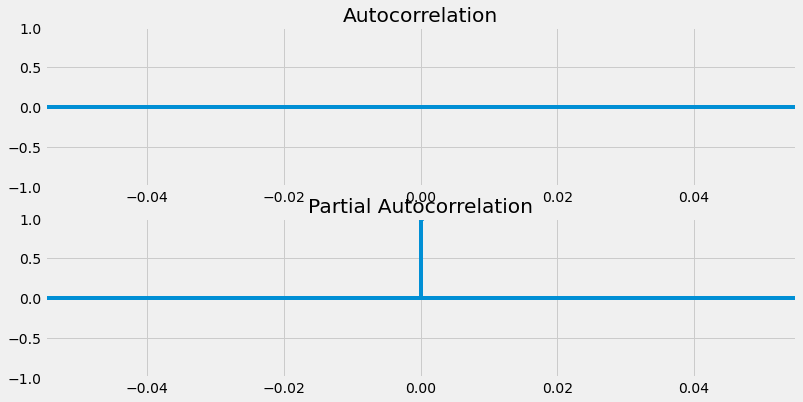

In [148]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6), sharex=False, sharey=False)
ax1 = plot_acf(isrp, lags=40, ax=ax1)
ax2 = plot_pacf(isrp, lags=40, ax=ax2)
plt.show()

Aplico la prueba Dickey-Fuller a la serie en niveles y parece indicar que la serie tiene raíz unitaria. Sin embargo, al sacar diferencias, la serie sí parece ser estacionaria:

In [149]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(isrp.dropna())

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -0.412502
p-value                         0.907990
#Lags Used                      3.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64


In [150]:
df_diff = isrp.diff().diff(4)
df_diff.dropna(inplace=True)
df_diff.tail()

fecha
2020-10-01   -45677.6577
2021-01-01   -22023.4469
2021-04-01    24809.1223
2021-07-01    10178.3419
2021-10-01    63632.9590
Name: isr_real, dtype: float64

In [151]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_diff)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -4.197515
p-value                         0.000665
#Lags Used                      9.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64


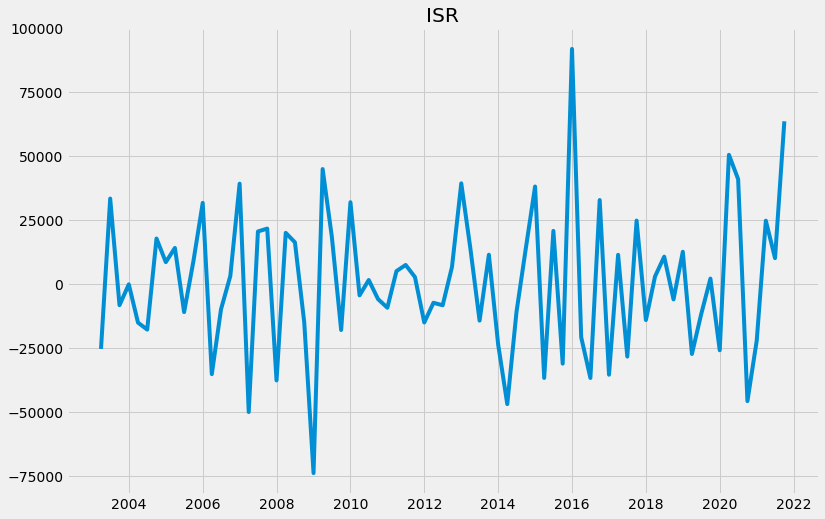

In [152]:
plt.plot(df_diff)
plt.title('ISR')
#plt.savefig('diffplot')
plt.show()

Los correlogramas de la serie en diferencias (aunque generan error)

Creo los objetos con las variables explicativas:

In [155]:
pib1=df[['reformaisr','pib_reale4']]
pib1.drop(pib1.tail(4).index,inplace=True)
pib1.shape

(80, 2)

In [156]:
pib1x=df[['reformaisr','pib_reale4']]
pib1x.drop(pib1x.head(80).index,inplace=True)
pib1x.shape

(4, 2)

Corro la función **auto_arima** inclyendo variables explicativas, y estos son los resultados que me arroja:

In [157]:
model = pm.auto_arima(isrp.dropna(), 
                      exogenous=pib1,
                      d=1, D=1,
                      seasonal=True, m=12, trend='c', 
                      start_p=0, start_q=0, max_order=12, test='adf', stepwise=True, trace=True)                     

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1624.830, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1624.476, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1599.957, Time=0.32 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1601.868, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.74 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1598.007, Time=0.60 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1598.037, Time=0.94 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1617.060, Time=0.43 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1597.176, Time=0.94 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1599.833, Time=0.37 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1596.632, Time=1.37 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.88 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=1591.854, Time=1.95 sec
 ARIMA(1,1,1)(2,1,1)[12]          

In [158]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   80
Model:             SARIMAX(3, 1, 1)x(2, 1, [], 12)   Log Likelihood                -771.263
Date:                             Thu, 24 Mar 2022   AIC                           1562.526
Time:                                     22:45:28   BIC                           1584.573
Sample:                                 01-01-2002   HQIC                          1571.250
                                      - 10-01-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1050.1132   7434.780      0.141      0.888   -1.35e+04    1.56e+04
reformaisr -4.676e+04   1.65e+04     -2.831      0.005   -7.91e+04   -1.44e+04
pib_reale4     0.0420      0.016      2.706      0.007       0.012       0.072
ar.L1         -0.9135      0.243     -3.764      0.000      -1.389      -0.438
ar.L2         -0.8940      0.190     -4.717      0.000      -1.265      -0.523
ar.L3         -0.7312      0.203     -3.610      0.000      -1.128      -0.334
ma.L1          0.4575      0.331      1.382      0.167      -0.191       1.106
ar.S.L12      -0.5357      0.284     -1.887      0.059      -1.092       0.021
ar.S.L24      -0.4690      0.269     -1.742      0.082      -0.997       0.059
sigma2      7.626e+08      0.264   2.89e+09      0.000    7.63e+08    7.63e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 2.66
Prob(Q):                              0.76   Prob(JB):                         0.26
Heteroskedasticity (H):               1.51   Skew:                             0.48
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.59e+25. Standard errors may be unstable.
"""

In [159]:
#divide into train and validation set
isr=isrp.dropna()
isr.shape

(80,)

In [160]:
model = SARIMAX(isr,order=(3,1,1),seasonal_order=(2,1,0,12),exog=pib1)
results = model.fit()
results.summary()

C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            isr_real   No. Observations:                   80
Model:             SARIMAX(3, 1, 1)x(2, 1, [], 12)   Log Likelihood                -771.372
Date:                             Thu, 24 Mar 2022   AIC                           1560.745
Time:                                     22:46:04   BIC                           1580.587
Sample:                                 01-01-2002   HQIC                          1568.597
                                      - 10-01-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
reformaisr -4.676e+04   1.59e+04     -2.943      0.003   -7.79e+04   -1.56e+04
pib_reale4     0.0410      0.015      2.776      0.006       0.012       0.070
ar.L1         -0.8989      0.258     -3.487      0.000      -1.404      -0.394
ar.L2         -0.8916      0.190     -4.696      0.000      -1.264      -0.519
ar.L3         -0.7216      0.207     -3.491      0.000      -1.127      -0.317
ma.L1          0.4245      0.341      1.244      0.214      -0.244       1.093
ar.S.L12      -0.5319      0.282     -1.885      0.059      -1.085       0.021
ar.S.L24      -0.4812      0.262     -1.836      0.066      -0.995       0.032
sigma2      7.623e+08      0.334   2.28e+09      0.000    7.62e+08    7.62e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.75
Prob(Q):                              0.85   Prob(JB):                         0.25
Heteroskedasticity (H):               1.50   Skew:                             0.49
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  1e+27. Standard errors may be unstable.
"""

Los residuales del modelo se comportan adecuadamente:

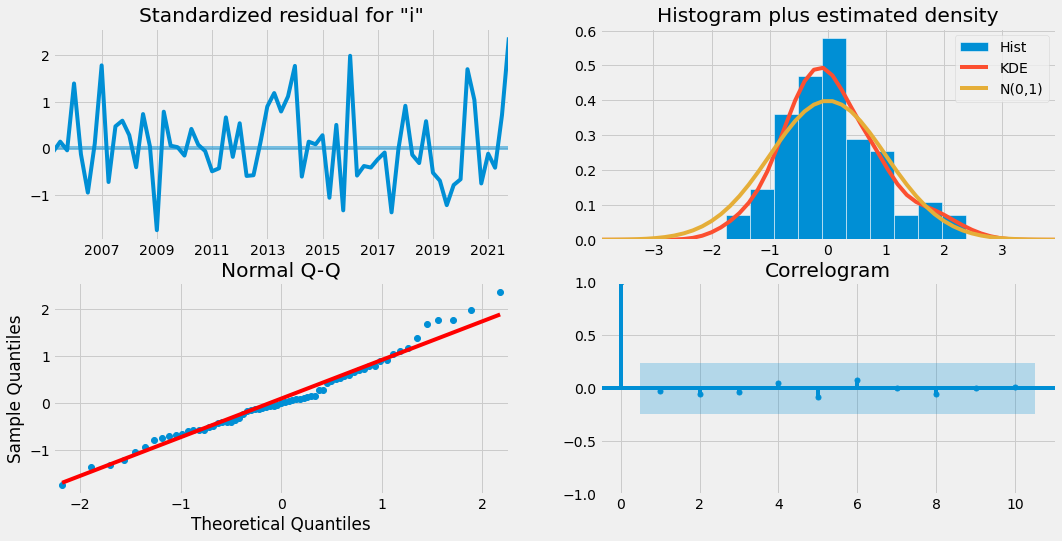

In [161]:
results.plot_diagnostics(figsize=(16, 8))
#plt.savefig('modeldiagnostics2')
plt.show()

Y el pronóstico en sí, también se ve bastante prometedor.

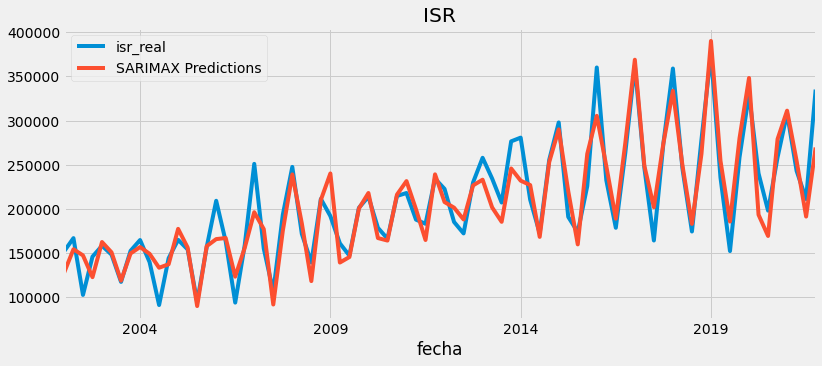

In [162]:
predictions = results.predict(start=0, end=len(isr)-1, dynamic=False, typ='levels', exog=pib1).rename('SARIMAX Predictions')
title = 'ISR'
ax = isr.plot(legend=True,figsize=(12,5),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

Calculo los estadísticos del modelo:

In [163]:
r2_score(isr, predictions)
evaluation_results = pd.DataFrame({'r2_score': r2_score(isr, predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(isr, predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(isr, predictions)
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - isr)/np.abs(isr))*100 

evaluation_results

r2_score  mean_absolute_error  mean_squared_error  \
0  0.872724         17372.730163        5.282070e+08   

   mean_absolute_percentage_error  
0                        9.103162

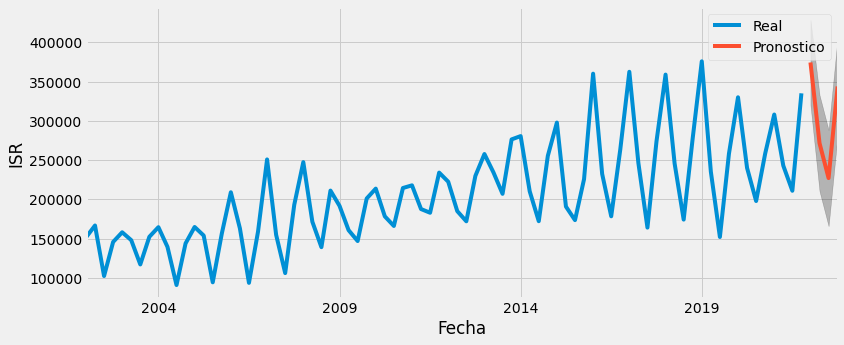

In [164]:
pred_f = results.get_forecast(steps=4, exog=pib1x)
pred_ci = pred_f.conf_int()
ax = isr.plot(label='Real', figsize=(12, 5))
pred_f.predicted_mean.plot(ax=ax, label='Pronostico')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('ISR')
plt.legend()
plt.show()

In [165]:
x=pred_f.predicted_mean
x.to_csv('arima_isr.csv')

### 5.2 Impuesto al Valor Agregado, IVA

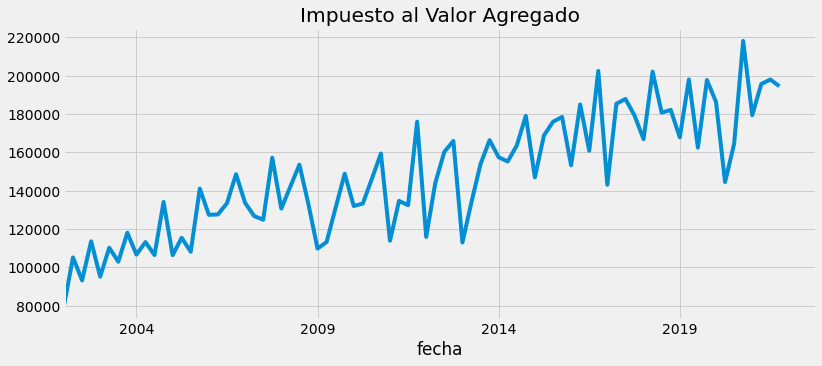

In [166]:
ivap=df['iva_real']
#iva=ivap.dropna()
ivap.plot(figsize=(12,5))
plt.title('Impuesto al Valor Agregado')
plt.show()

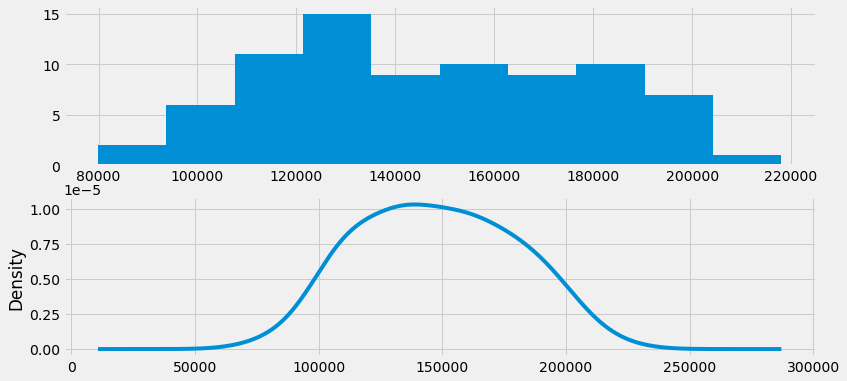

In [167]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,6))
ivap.hist(ax=ax1)
ivap.plot(kind='kde',ax=ax2)
plt.show()

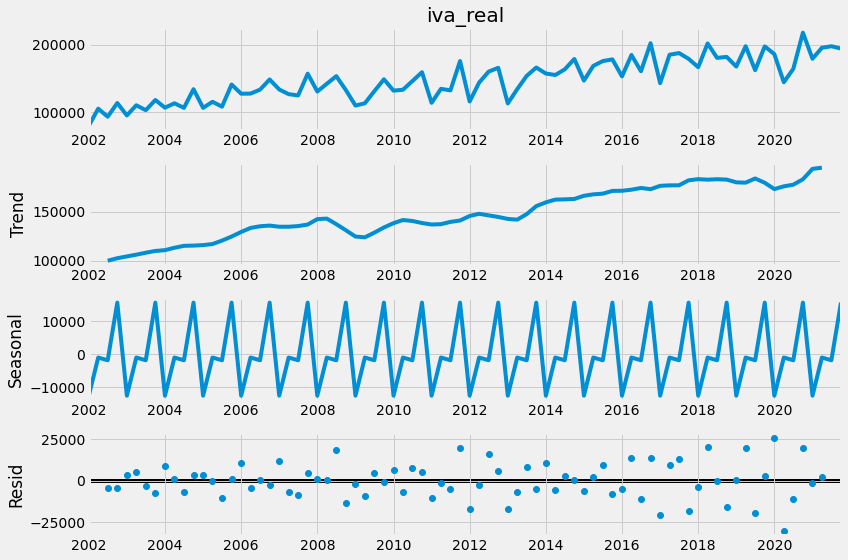

In [168]:
decomposition = seasonal_decompose(ivap.dropna(), model='additive')
plt.rcParams['figure.figsize'] = 12, 8
decomposition.plot()
plt.show()

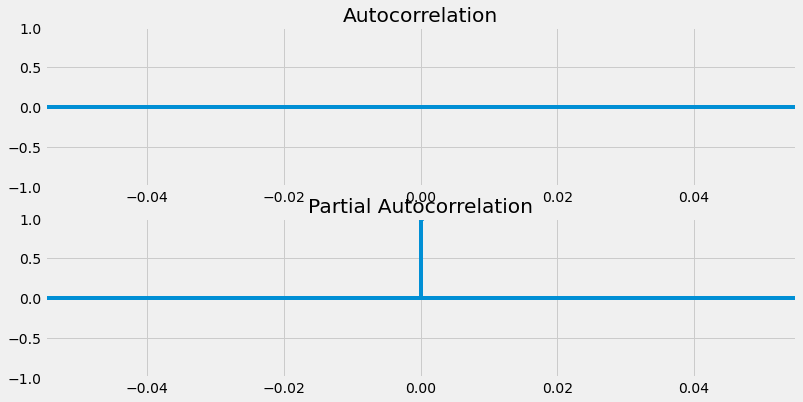

In [169]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6), sharex=False, sharey=False)
ax1 = plot_acf(ivap, lags=40, ax=ax1)
ax2 = plot_pacf(ivap, lags=40, ax=ax2)
plt.show()

In [170]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ivap.dropna())

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -0.933143
p-value                         0.776862
#Lags Used                      7.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


In [171]:
df_diff = ivap.diff().diff(4)
df_diff.dropna(inplace=True)
df_diff.tail()

fecha
2020-10-01    18343.2977
2021-01-01   -27233.5372
2021-04-01    58045.0968
2021-07-01   -17634.9677
2021-10-01   -57107.8782
Name: iva_real, dtype: float64

In [172]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_diff)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -8.199849e+00
p-value                        7.280409e-13
#Lags Used                     5.000000e+00
Number of Observations Used    6.900000e+01
Critical Value (1%)           -3.528890e+00
Critical Value (5%)           -2.904440e+00
Critical Value (10%)          -2.589656e+00
dtype: float64


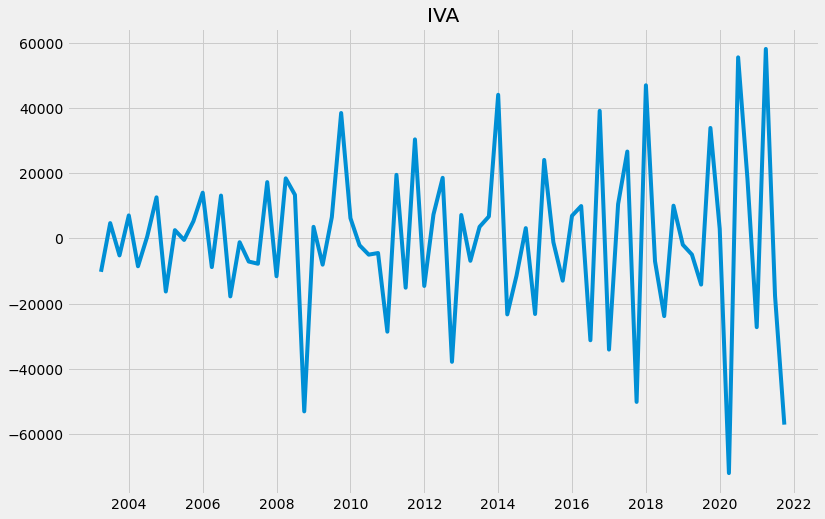

In [173]:
plt.plot(df_diff)
plt.title('IVA')
#plt.savefig('diffplot')
plt.show()

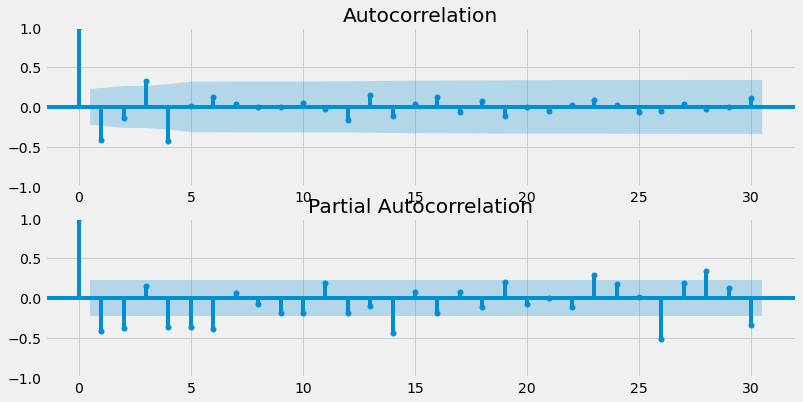

In [174]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6), sharex=False, sharey=False)
ax1 = plot_acf(df_diff, lags=30, ax=ax1)
ax2 = plot_pacf(df_diff, lags=30, ax=ax2)
#plt.savefig('acfpacf2')
plt.show()

In [176]:
pib2=df[['tasa iva','pib_reale4']]
pib2.drop(pib2.tail(4).index,inplace=True)
pib2.shape

(80, 2)

In [177]:
pib2x=df[['tasa iva','pib_reale4']]
pib2x.drop(pib2x.head(80).index,inplace=True)
pib2x.shape

(4, 2)

In [178]:
model = pm.auto_arima(ivap.dropna(), 
                      exogenous=pib2,
                      d=1, D=1,
                      seasonal=True, m=12, trend='c', 
                      start_p=0, start_q=0, max_order=6, test='adf', stepwise=True, trace=True)                     

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1536.083, Time=0.39 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1545.666, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1535.563, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1519.346, Time=0.37 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1544.483, Time=0.18 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1521.264, Time=1.17 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1521.306, Time=1.49 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1528.643, Time=0.43 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=2.39 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1534.218, Time=0.19 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1521.260, Time=0.45 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1521.685, Time=0.43 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1525.790, Time=0.23 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1520.784, Time=0.74 sec
 ARIMA(0,1,1)(0,1,1)[12]

In [179]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   80
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -753.673
Date:                            Thu, 24 Mar 2022   AIC                           1519.346
Time:                                    22:47:26   BIC                           1532.574
Sample:                                01-01-2002   HQIC                          1524.580
                                     - 10-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    988.4897    502.390      1.968      0.049       3.823    1973.157
tasa iva    1.442e+04   2474.414      5.827      0.000    9568.098    1.93e+04
pib_reale4    -0.0070      0.009     -0.821      0.412      -0.024       0.010
ma.L1         -0.5388      0.112     -4.804      0.000      -0.759      -0.319
ma.S.L12      -0.7716      0.237     -3.263      0.001      -1.235      -0.308
sigma2      3.096e+08      0.060   5.18e+09      0.000     3.1e+08     3.1e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 2.37
Prob(Q):                              0.70   Prob(JB):                         0.31
Heteroskedasticity (H):               1.64   Skew:                            -0.42
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.45e+24. Standard errors may be unstable.
"""

In [180]:
#divide into train and validation set
iva=ivap.dropna()
iva.shape

(80,)

In [181]:
model = SARIMAX(iva,order=(0,1,1),seasonal_order=(0,1,1,12),exog=pib2)
results = model.fit()
results.summary()

C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Homar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           iva_real   No. Observations:                   80
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -753.857
Date:                            Thu, 24 Mar 2022   AIC                           1517.715
Time:                                    22:47:42   BIC                           1528.738
Sample:                                01-01-2002   HQIC                          1522.077
                                     - 10-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
tasa iva    1.442e+04   2741.157      5.260      0.000    9045.294    1.98e+04
pib_reale4    -0.0185      0.009     -1.995      0.046      -0.037      -0.000
ma.L1         -0.6129      0.112     -5.486      0.000      -0.832      -0.394
ma.S.L12      -0.8048      0.287     -2.808      0.005      -1.366      -0.243
sigma2      3.104e+08      0.059   5.26e+09      0.000     3.1e+08     3.1e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                11.78
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               1.76   Skew:                            -0.74
Prob(H) (two-sided):                  0.19   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.34e+25. Standard errors may be unstable.
"""

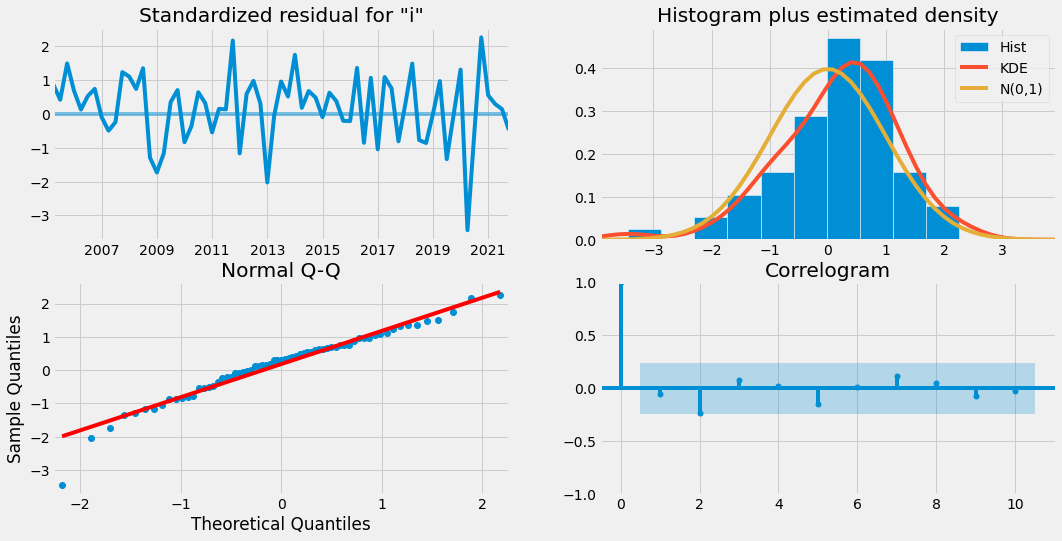

In [182]:
results.plot_diagnostics(figsize=(16, 8))
#plt.savefig('modeldiagnostics2')
plt.show()

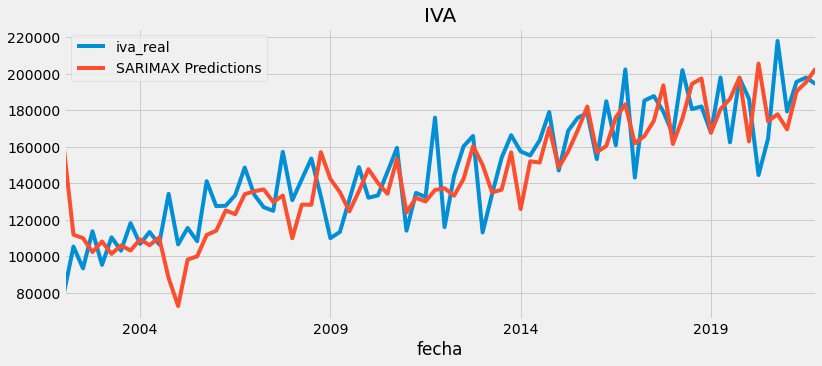

In [183]:
predictions = results.predict(start=0, end=len(iva)-1, dynamic=False, typ='levels', exog=pib2).rename('SARIMAX Predictions')
title = 'IVA'
ax = iva.plot(legend=True,figsize=(12,5),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [184]:
r2_score(iva, predictions)
evaluation_results = pd.DataFrame({'r2_score': r2_score(iva, predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(iva, predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(iva, predictions)
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - iva)/np.abs(iva))*100 

evaluation_results

r2_score  mean_absolute_error  mean_squared_error  \
0  0.564705         15360.236294        4.175879e+08   

   mean_absolute_percentage_error  
0                       11.246284

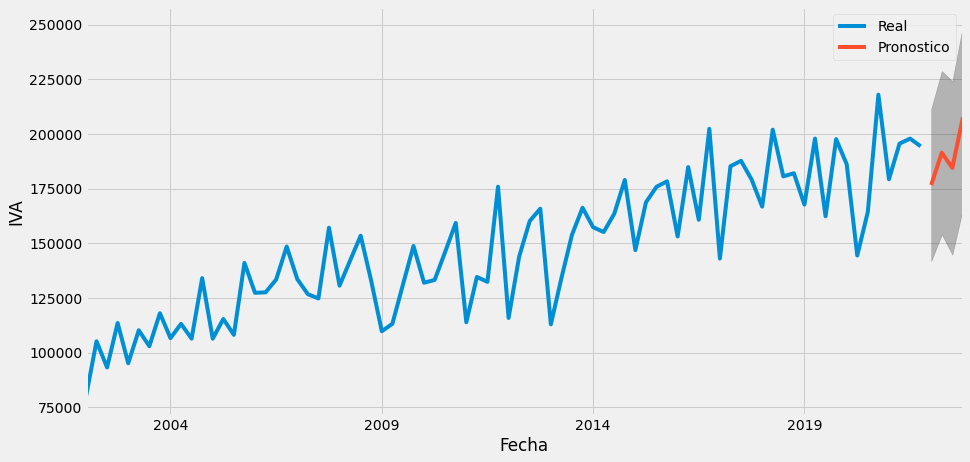

In [185]:
pred_f = results.get_forecast(steps=4, exog=pib2x)
pred_ci = pred_f.conf_int()
ax = iva.plot(label='Real', figsize=(14, 7))
pred_f.predicted_mean.plot(ax=ax, label='Pronostico')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('IVA')
plt.legend()
plt.show()

In [186]:
x=pred_f.predicted_mean
x.to_csv('arima_iva.csv')